# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [18]:
# Installing the libraries with the specified version.
!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 41.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.5.3 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompa

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [19]:
# Mounted at /content/drive for Google Colab to get required data from drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [20]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import library for probability distribution and statistic data
import scipy.stats as stats

# statistical libraries for Python
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# prediction libraries for Python (Train/Test + Tree)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    roc_curve,
)
# disable display column & row limits
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [21]:
# read the data from dataset using panda
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/INNHotelsGroup.csv")
data = df.copy()

## Data Overview

- Observations
- Sanity checks

In [22]:
# view first five rows of data
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [23]:
# view last five rows od data
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

In [24]:
# I get same random results every time
np.random.seed(1)
df.sample(n=50)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
30392   INN30393             1               0                     1   
6685    INN06686             2               0                     1   
8369    INN08370             2               0                     2   
2055    INN02056             2               0                     0   
10969   INN10970             1               0                     2   
24881   INN24882             2               0                     3   
28658   INN28659             2               0                     0   
20853   INN20854             2               0                     1   
8501    INN08502             2               0                     0   
1942    INN01943             2               0                     0   
15648   INN15649             2               0                     2   
6116    INN06117             2               0                     0   
7868    INN07869             2               0                     2   
24527   INN24528             2               0                     0   
24227   INN24228             2               0                     1   
17216   INN17217             2               0                     0   
31124   INN31125             1               0                     0   
9101    INN09102             1               0                     2   
9474    INN09475             2               0                     0   
12782   INN12783             2               0                     0   
28297   INN28298             1               0                     2   
22021   INN22022             2               0                     0   
26586   INN26587             3               0                     2   
16756   INN16757             2               0                     1   
20927   INN20928             2               0                     2   
35753   INN35754             2               0                     1   
9359    INN09360             1               0                     1   
21929   INN21930             1               0                     0   
17501   INN17502             2               0                     0   
3355    INN03356             2               1                     2   
22183   INN22184             1               0                     0   
7818    INN07819             2               0                     0   
26360   INN26361             2               0                     0   
15193   INN15194             2               0                     0   
19873   INN19874             2               0                     0   
8015    INN08016             1               1                     0   
36151   INN36152             2               0                     2   
21254   INN21255             1               0                     1   
16881   INN16882             2               0                     1   
9465    INN09466             2               0                     2   
18785   INN18786             1               0                     0   
28097   INN28098             2               0                     1   
29239   INN29240             1               0                     0   
664     INN00665             2               1                     1   
8285    INN08286             2               0                     2   
4598    INN04599             2               0                     1   
21340   INN21341             2               2                     0   
12098   INN12099             2               0                     1   
2904    INN02905             2               0                     0   
21902   INN21903             2               0                     2   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
30392                  0      Not Selected                           0   
6685                   2       Meal Plan 1                           0   
8369                   3       Meal Plan 1                           0   
2055                   2      Not Sel

In [25]:
# view the size of the data set
df.shape

(36275, 19)

In [26]:
# view the data types of a data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [27]:
# check for duplicate values
df[df.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [28]:
# checking for null values data is complete
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [29]:
# To drop booking_id
data = data.drop('Booking_ID', axis=1)

In [30]:
# view what are the values in object data type
cat_columns =['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
**************************************************
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
**************************************************
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
**************************************************
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
**************************************************


In [31]:
data.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

In [32]:
data.describe(include=['object'])

type_of_meal_plan room_type_reserved market_segment_type booking_status
count              36275              36275               36275          36275
unique                 4                  7                   5              2
top          Meal Plan 1        Room_Type 1              Online   Not_Canceled
freq               27835              28130               23214          24390

***Observations***

* 5 columns are object data sets and the Booking_ID (dropped).The 'booking_status' set to True/False.

*  36275 entries(rows) and 19 (columns) with no missing or duplicated data. This is well managed data set.



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [33]:
# To create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [34]:
# To plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

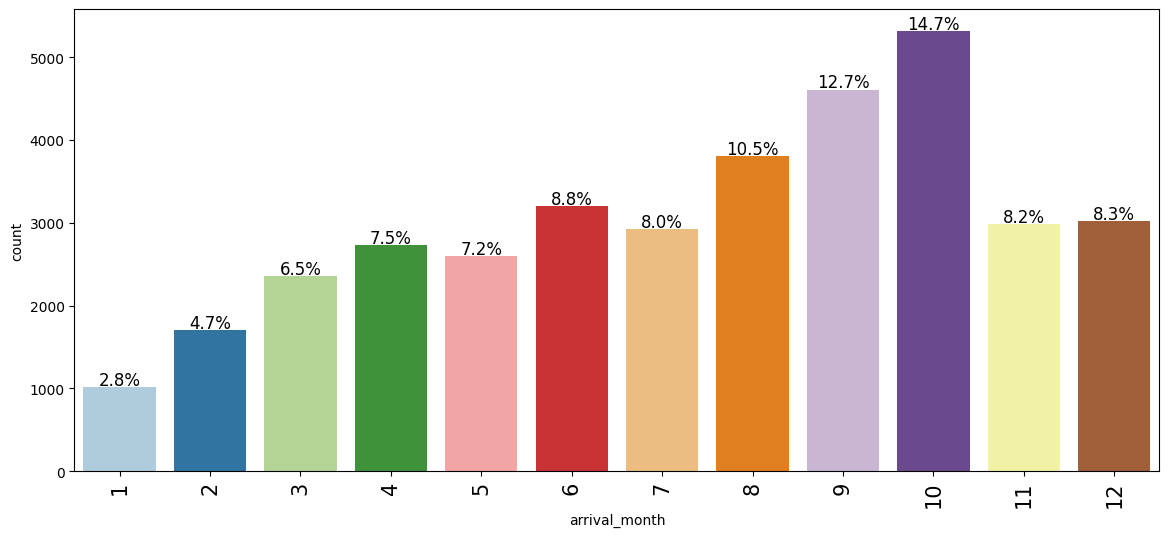

In [35]:
labeled_barplot(data=data, feature="arrival_month", perc=True, n=None)

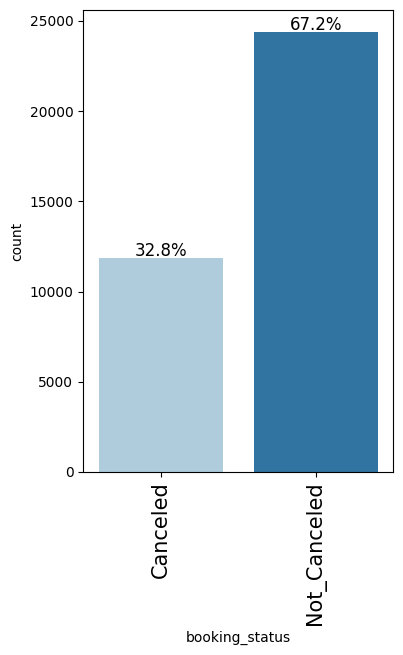

In [36]:
labeled_barplot(data, 'booking_status', perc=True, n=None)

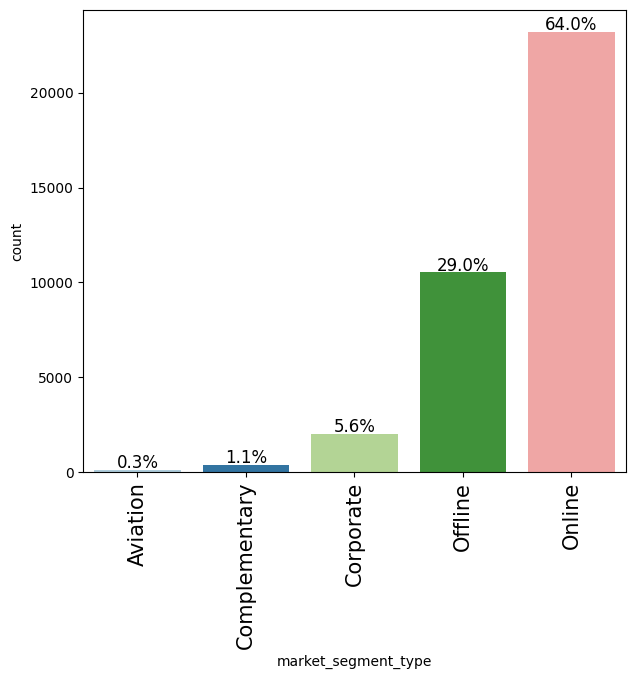

In [37]:
labeled_barplot(data, 'market_segment_type', perc=True, n=None)

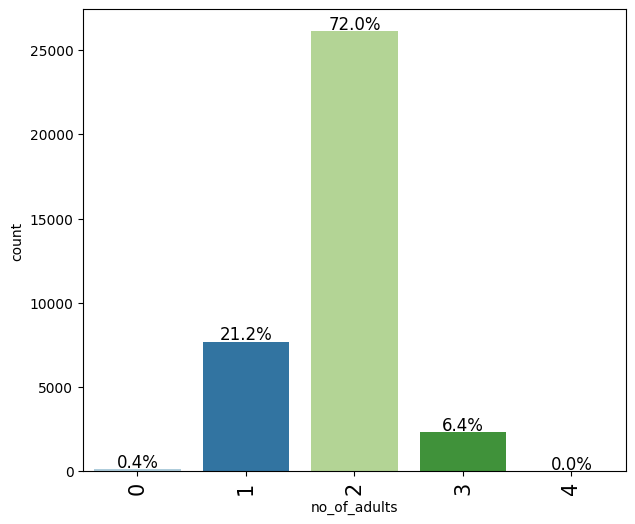

In [38]:
labeled_barplot(data, 'no_of_adults', perc=True)

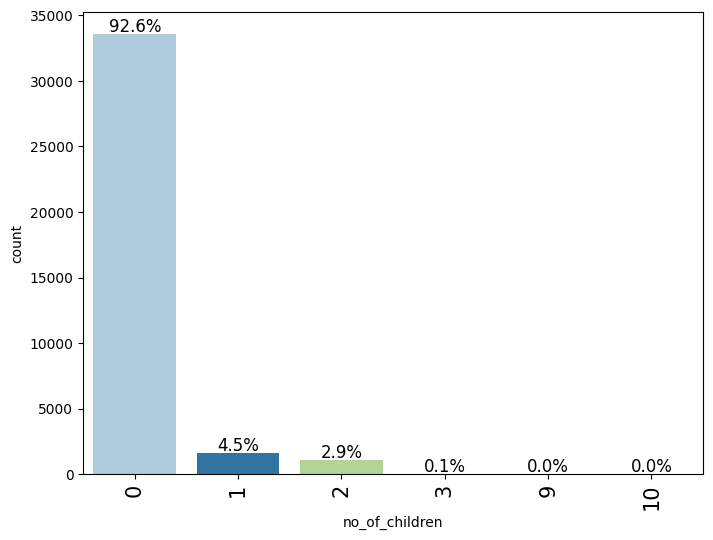

In [39]:
labeled_barplot(df, 'no_of_children', perc=True)

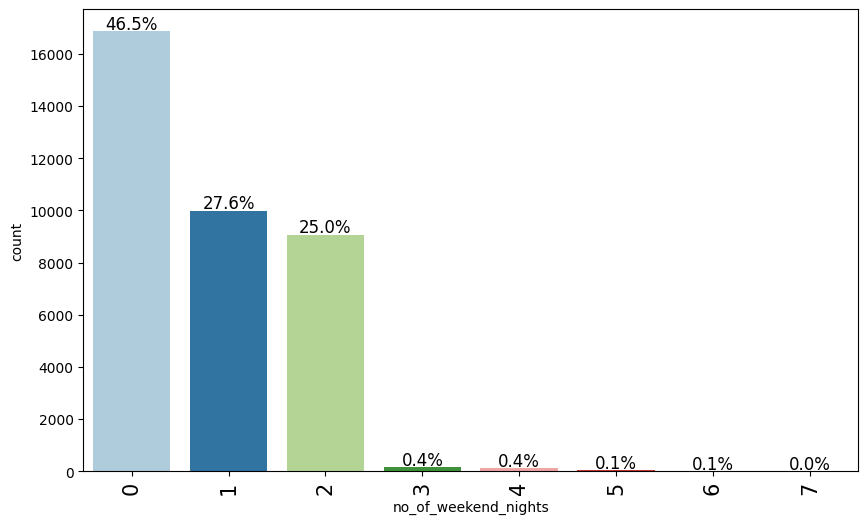

In [40]:
labeled_barplot(df, 'no_of_weekend_nights', perc=True)

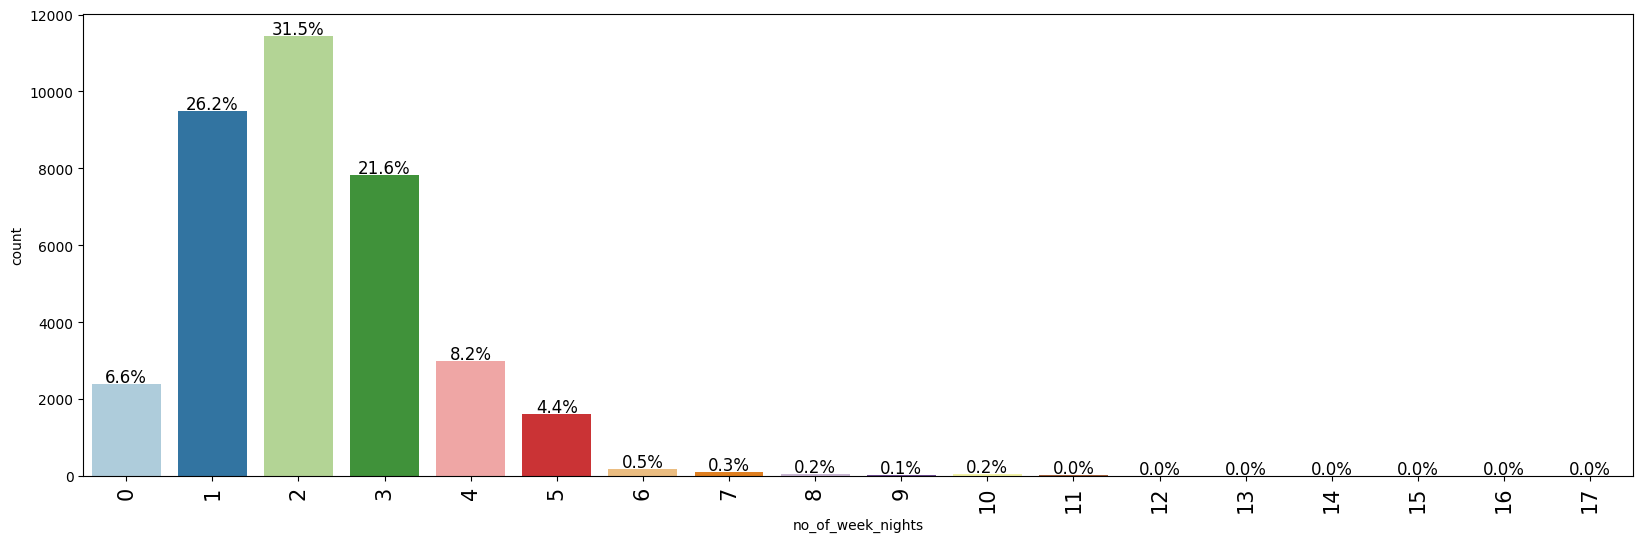

In [41]:
labeled_barplot(df,'no_of_week_nights', perc=True)

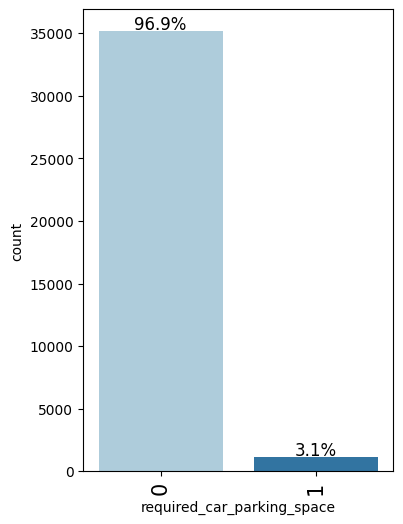

In [42]:
labeled_barplot(df, 'required_car_parking_space', perc=True)

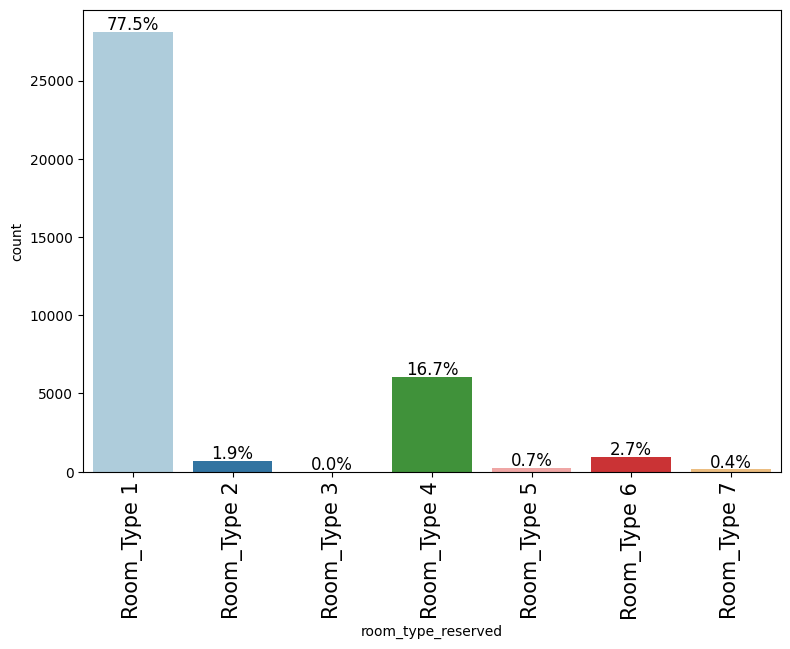

In [43]:
labeled_barplot(df,'room_type_reserved', perc=True)

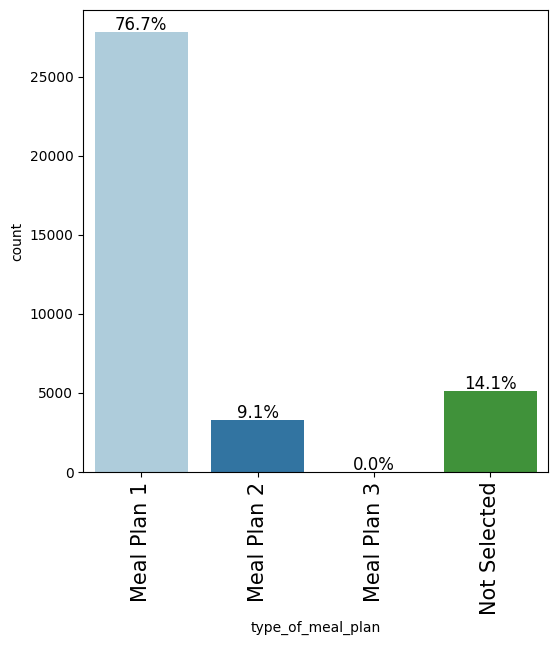

In [44]:
labeled_barplot(df,'type_of_meal_plan',perc=True)

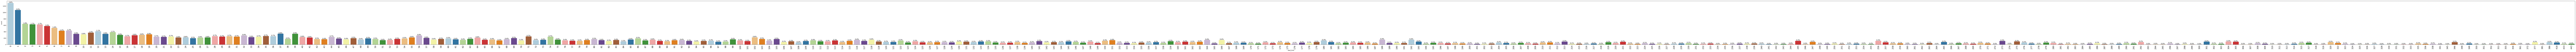

In [45]:
labeled_barplot(df,'lead_time',perc=True)

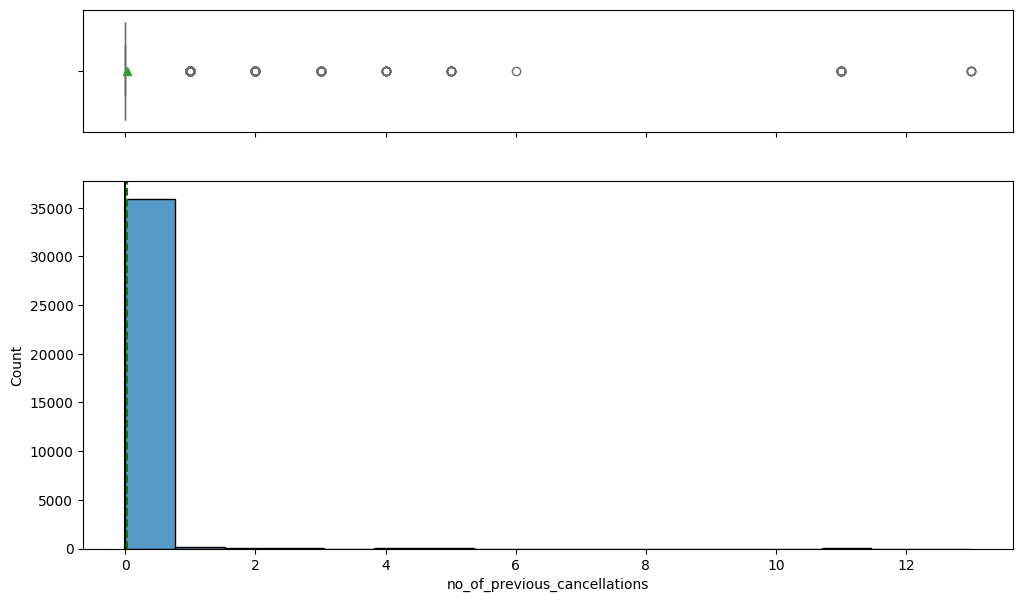

In [46]:
histogram_boxplot(df,'no_of_previous_cancellations')

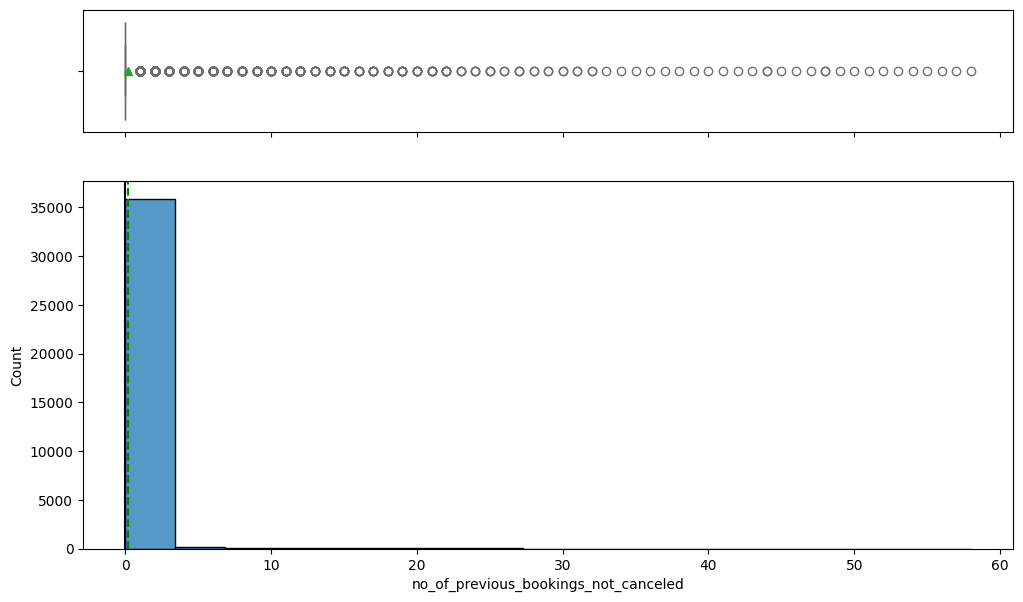

In [47]:
histogram_boxplot(df,'no_of_previous_bookings_not_canceled')

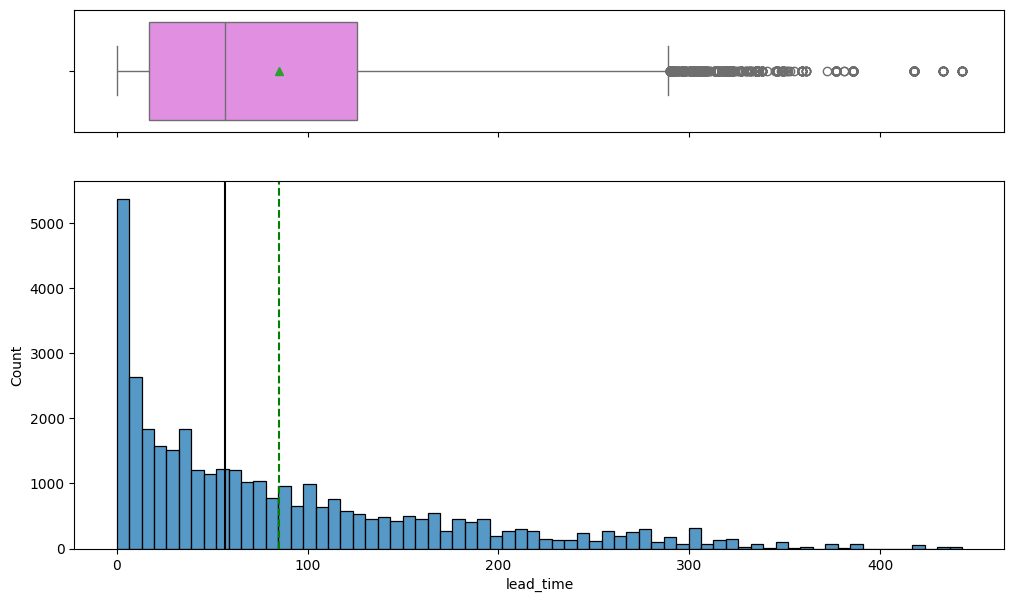

In [48]:
histogram_boxplot(data=df, feature="lead_time")

In [49]:
# To find Hotel free rooms
data[data['avg_price_per_room']==0]


no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
63                1               0                     0                  1   
145               1               0                     0                  2   
209               1               0                     0                  0   
266               1               0                     0                  2   
267               1               0                     2                  1   
...             ...             ...                   ...                ...   
35983             1               0                     0                  1   
36080             1               0                     1                  1   
36114             1               0                     0                  1   
36217             2               0                     2                  1   
36250             1               0                     0                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
63          Meal Plan 1                           0        Room_Type 1   
145         Meal Plan 1                           0        Room_Type 1   
209         Meal Plan 1                           0        Room_Type 1   
266         Meal Plan 1                           0        Room_Type 1   
267         Meal Plan 1                           0        Room_Type 1   
...                 ...                         ...                ...   
35983       Meal Plan 1                           0        Room_Type 7   
36080       Meal Plan 1                           0        Room_Type 7   
36114       Meal Plan 1                           0        Room_Type 1   
36217       Meal Plan 1                           0        Room_Type 2   
36250       Meal Plan 2                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
63             2          2017              9            10   
145           13          2018              6             1   
209            4          2018              2            27   
266            1          2017              8            12   
267            4          2017              8            23   
...          ...           ...            ...           ...   
35983          0          2018              6             7   
36080          0          2018              3            21   
36114          1          2018              3             2   
36217          3          2017              8             9   
36250          6          2017             12            10   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
63          Complementary               0                             0   
145         Complementary               1                             3   
209         Complementary               0                             0   
266         Complementary               1                             0   
267         Complementary               0                             0   
...                   ...             ...                           ...   
35983       Complementary               1                             4   
36080       Complementary               1                             3   
36114              Online               0                             0   
36217              Online               0                             0   
36250              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
63                                        0                 0.0   
145                                       5                 0.0   
209                                       0                 0.0   
266                                       1                 0.0   
267                                       0                 0.0   
...                                     ...                 ...   
35983                         

In [50]:
df.loc[df['avg_price_per_room']==0, 'market_segment_type'].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

<Axes: xlabel='market_segment_type', ylabel='avg_price_per_room'>

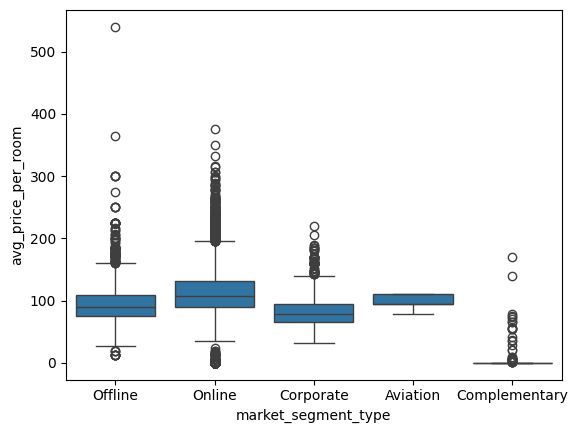

In [52]:
sns.boxplot(data=df, y='avg_price_per_room' , x='market_segment_type')

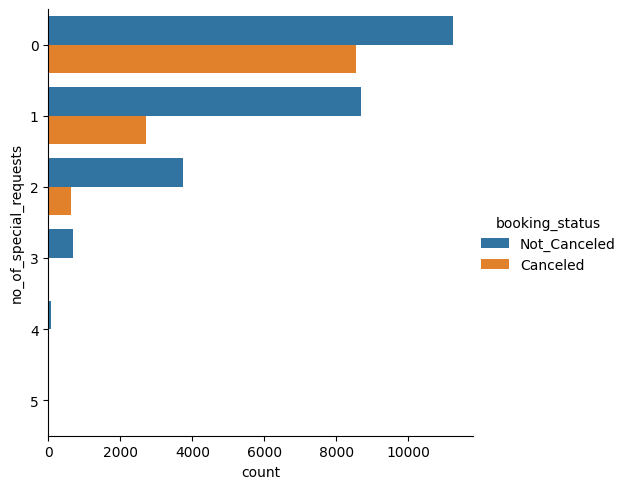

In [53]:
sns.catplot(data=df ,y='no_of_special_requests', hue='booking_status', kind='count')

<Axes: >

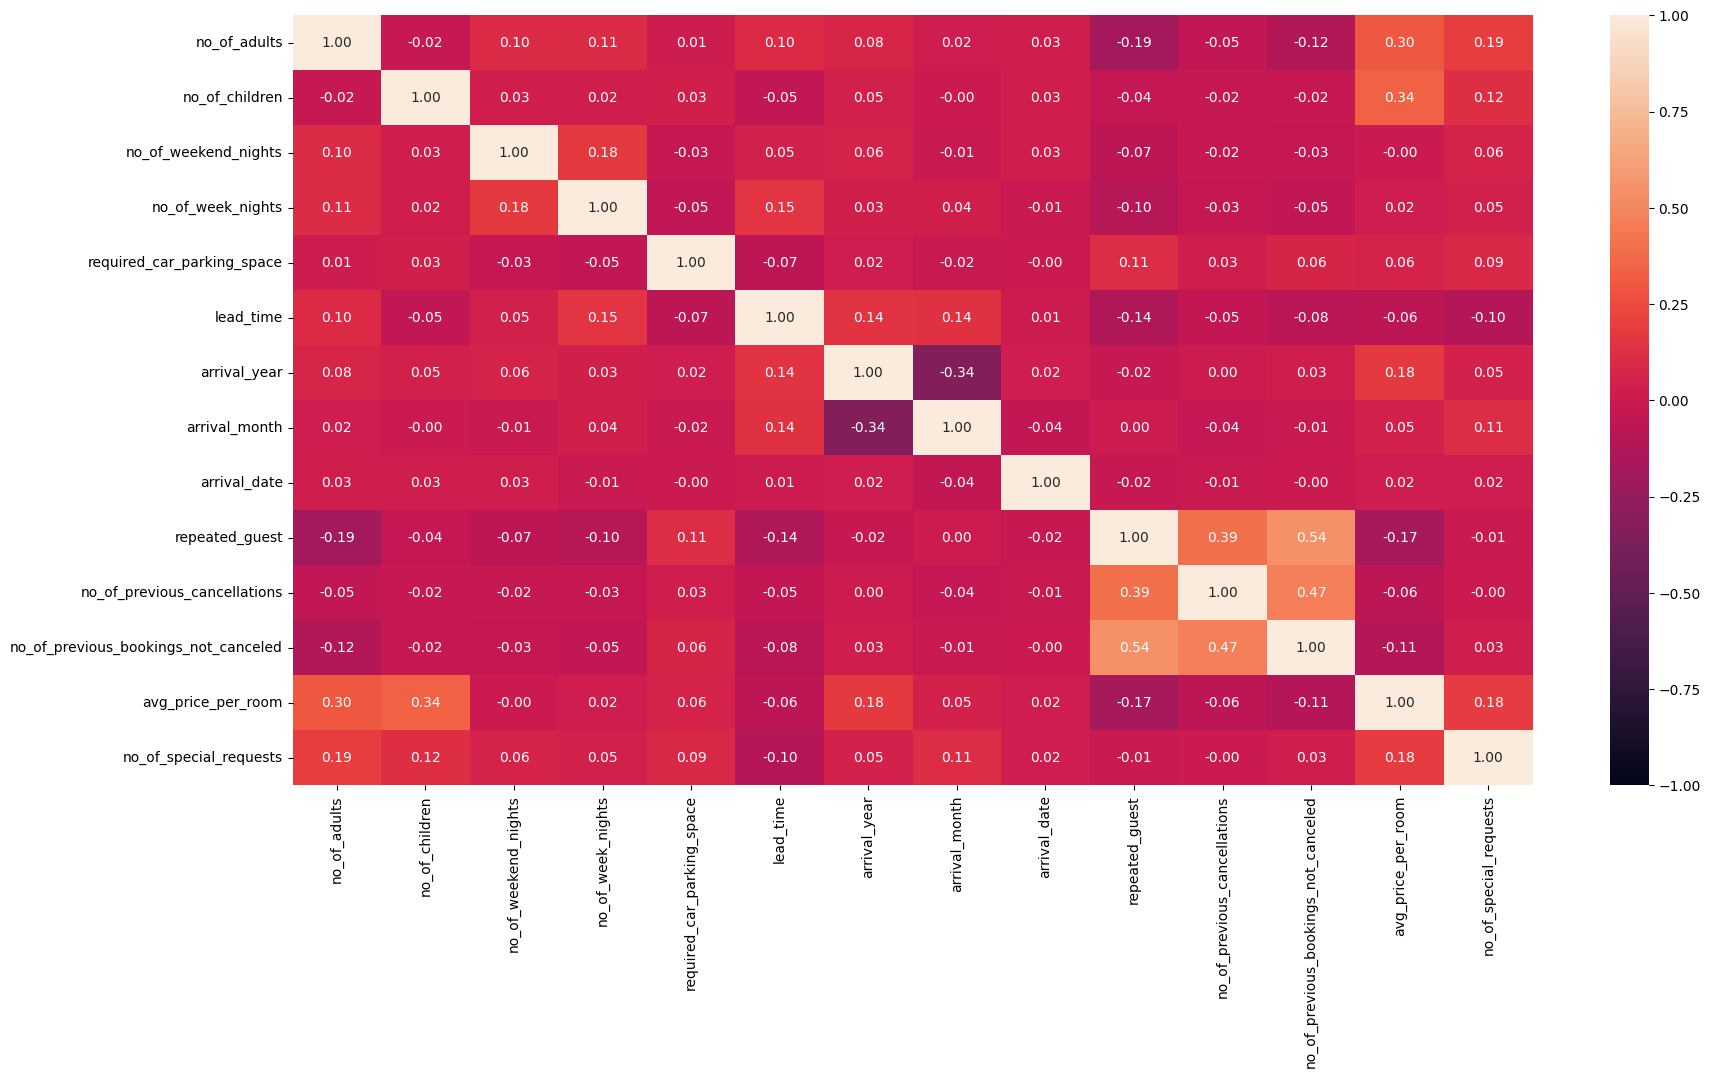

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, vmin=-1, vmax=1, fmt='.2f')

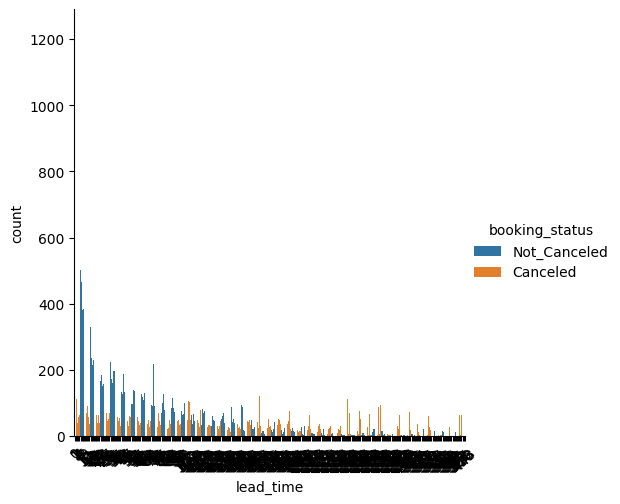

In [55]:
# hoe does lead time effect cancellation
sns.catplot(data=df, x='lead_time', hue='booking_status', kind='count')
plt.xticks(rotation=45)
plt.show()

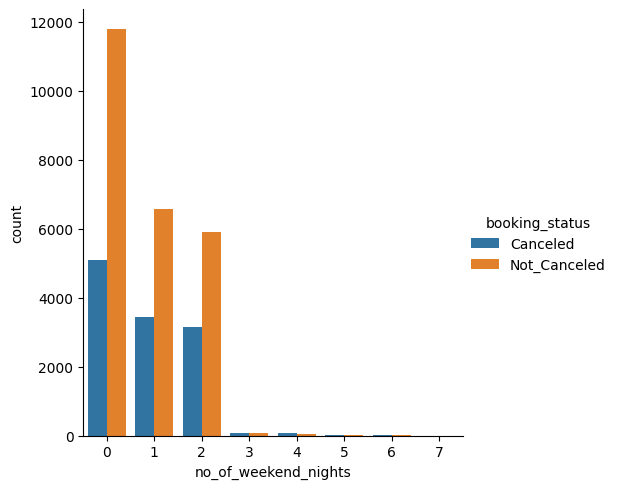

In [57]:
# To find booking status count
sns.catplot(data=df, x='no_of_weekend_nights', hue='booking_status', kind='count')
plt.show()


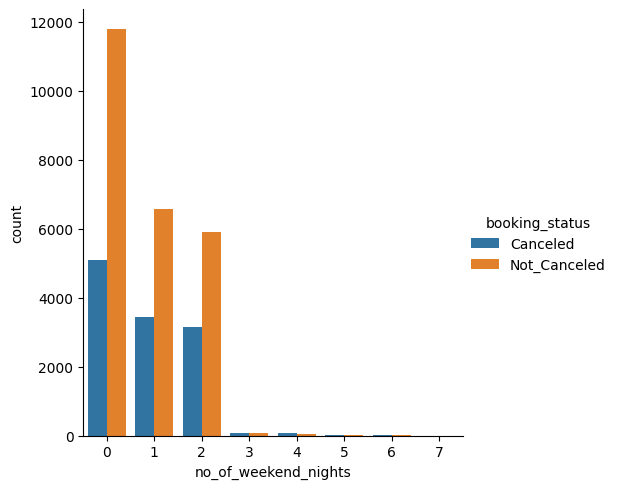

In [58]:
sns.catplot(data=df, x='no_of_weekend_nights', hue='booking_status', kind='count')
plt.show()

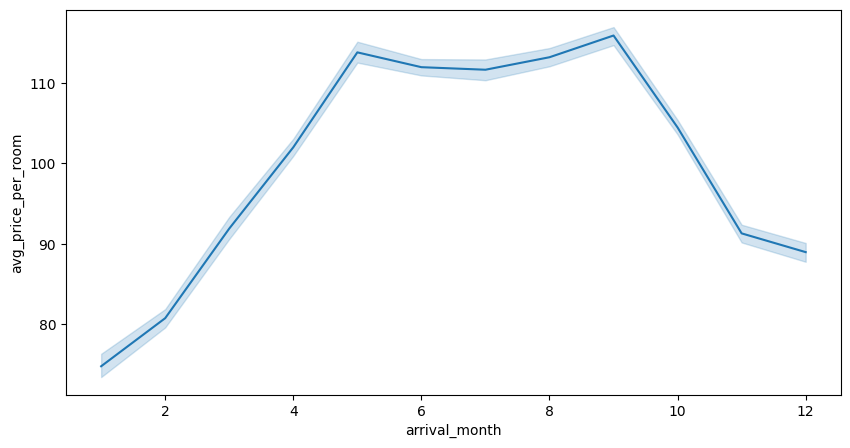

In [59]:
# To find some of the months are busier than others
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='arrival_month', y='avg_price_per_room')
plt.show()

In [61]:
# new column for length to stay
data['length_stay'] = data['no_of_weekend_nights'] + data['no_of_week_nights']

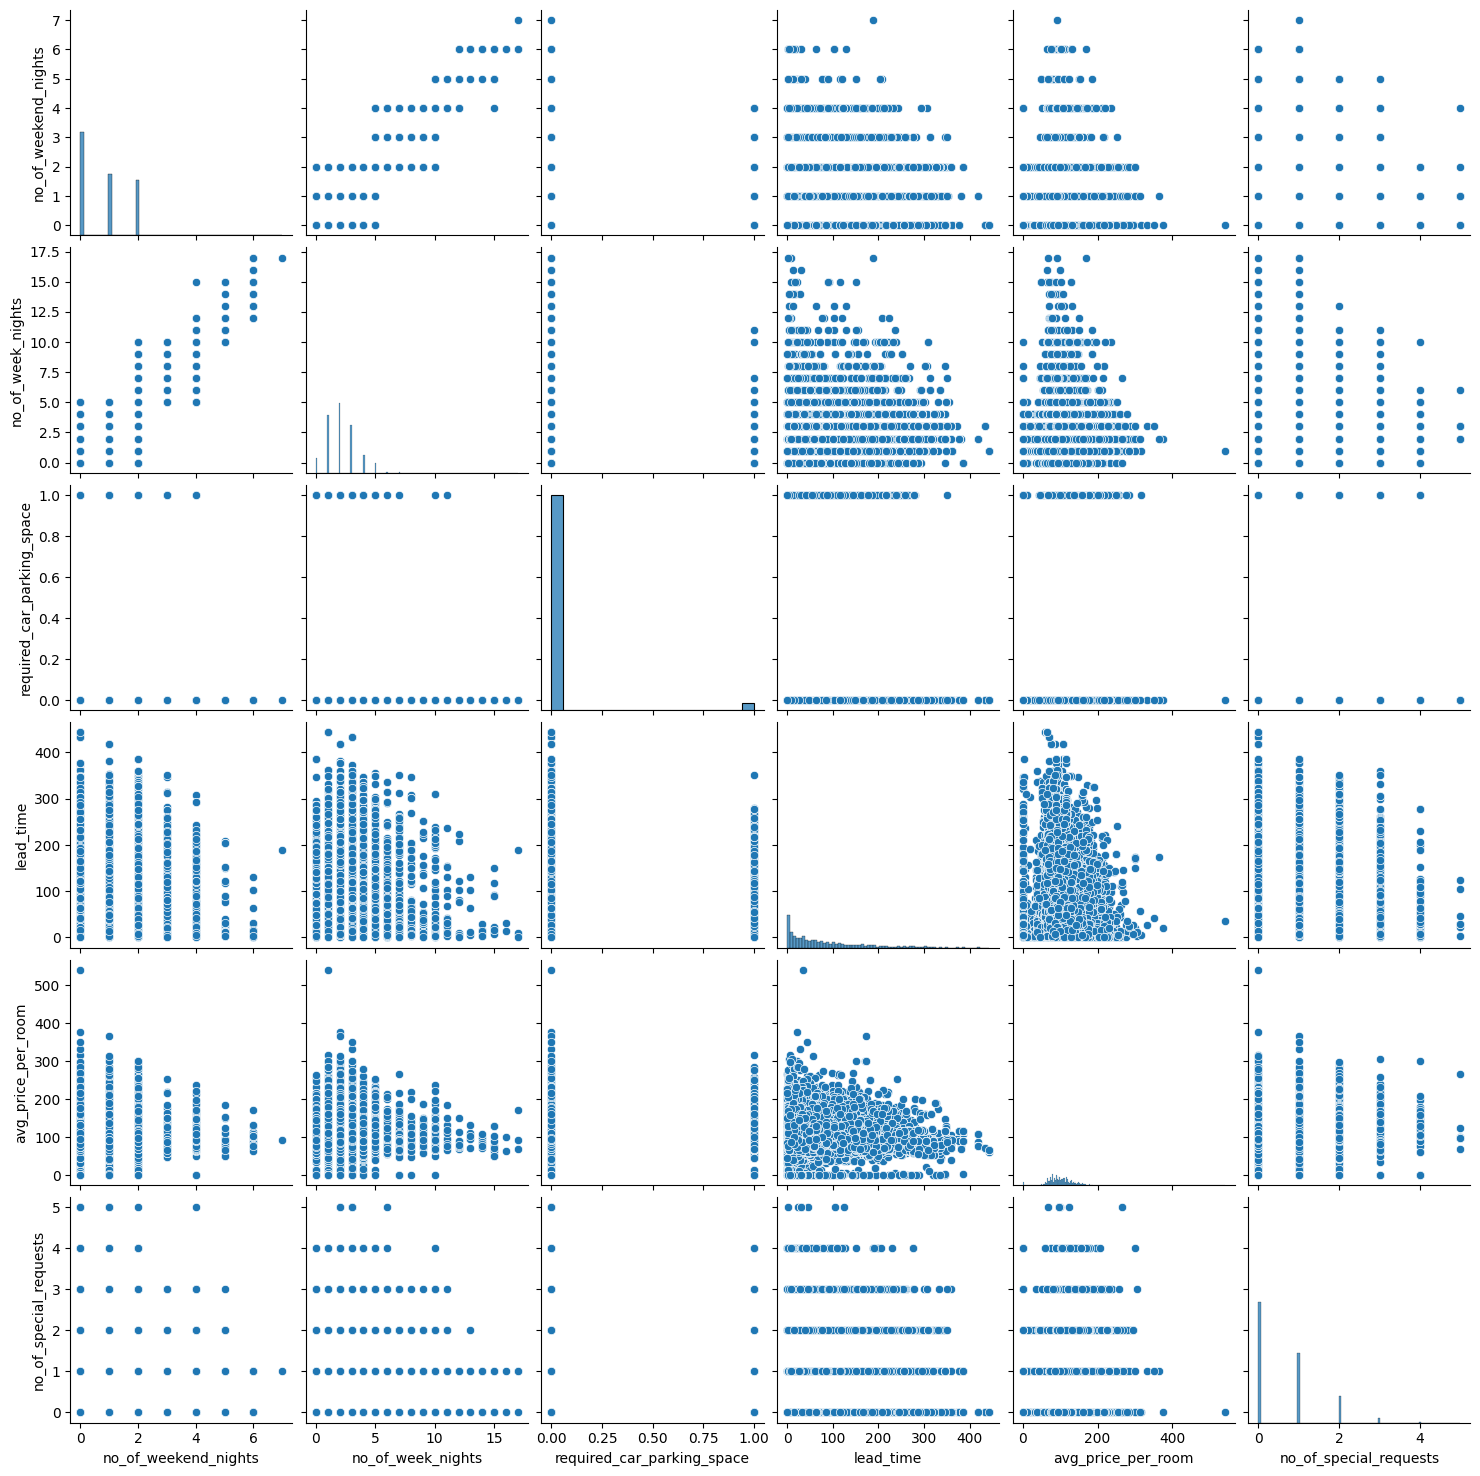

In [62]:
sns.pairplot(df[['no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space','lead_time', 'avg_price_per_room', 'no_of_special_requests',
                 'type_of_meal_plan','room_type_reserved','market_segment_type','booking_status', ]]);

**Leading Questions Answered:**


What are the busiest months in the hotel?

Answear: **October with 14.7 % of total booking for the year.**


Which market segment do most of the guests come from?

Answear: **Online 23214 or 64% of the booking come via the internet.**


Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

Answer : **Online booking are the highest despite also having the highest amountof free rooms. Aviation, offline and corporate are generally slightly lower priced with corporate edging out for the lowest.**

What percentage of bookings are canceled?

Answer:  **Around 1/3(11885) of bookings are canceled in the given data.**

Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

Answer: **Reapting guest rarely canceled (1.75%).**

Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

Answer: **Special request begins to reduced the cancellation at one and  progressively reduce cancellation to zero.**



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [114]:
data.loc[data['booking_status']=='Not_Canceled', 'booking_status'] = False
data.loc[data['booking_status']=='Canceled', 'booking_status'] = True

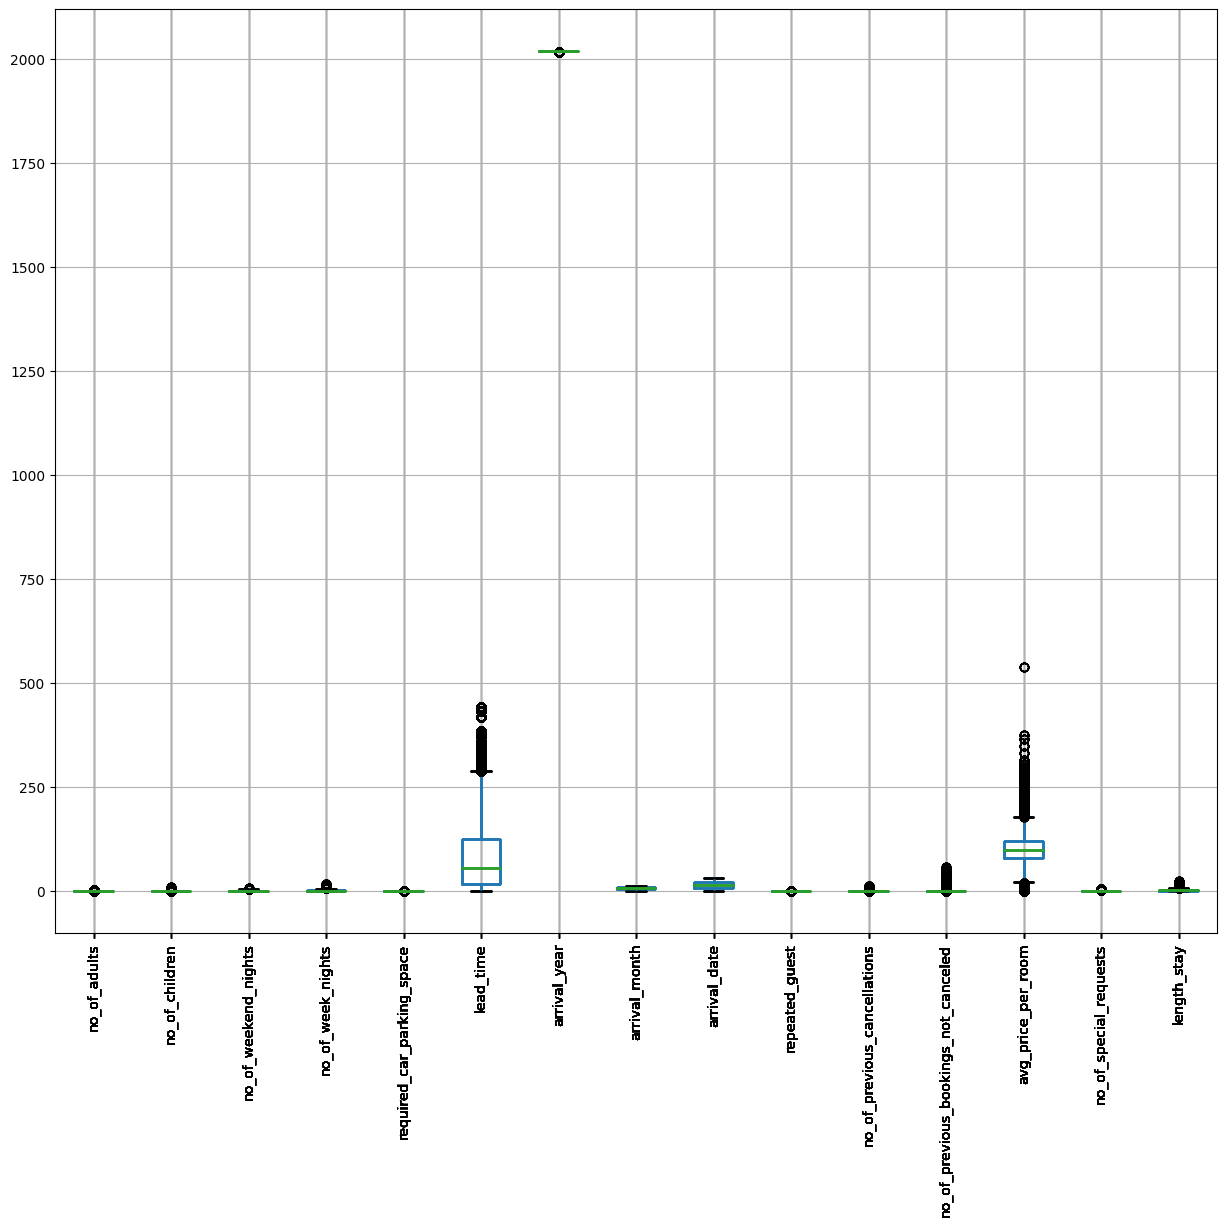

In [115]:
# drop colum beacuse they were either time, or not helpful

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("arrival_year")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    data.boxplot()

plt.xticks(rotation=90)
plt.show()


In [122]:
#  Avg price room
Quartiles = np.quantile(data['avg_price_per_room'][data['avg_price_per_room'].notnull()], [.25,.75])
power_4iqr = 4 * (Quartiles[1] - Quartiles[0])
print(f'Q1 = {Quartiles[0]}, Q3 = {Quartiles[1]}, 4*IQR =  {power_4iqr}')
outlier_powers = data.loc[np.abs(data['avg_price_per_room'] - data['avg_price_per_room'].median()) > power_4iqr, 'avg_price_per_room']
outlier_powers.shape

Q1 = 80.3, Q3 = 120.0, 4*IQR =  158.8


(49,)

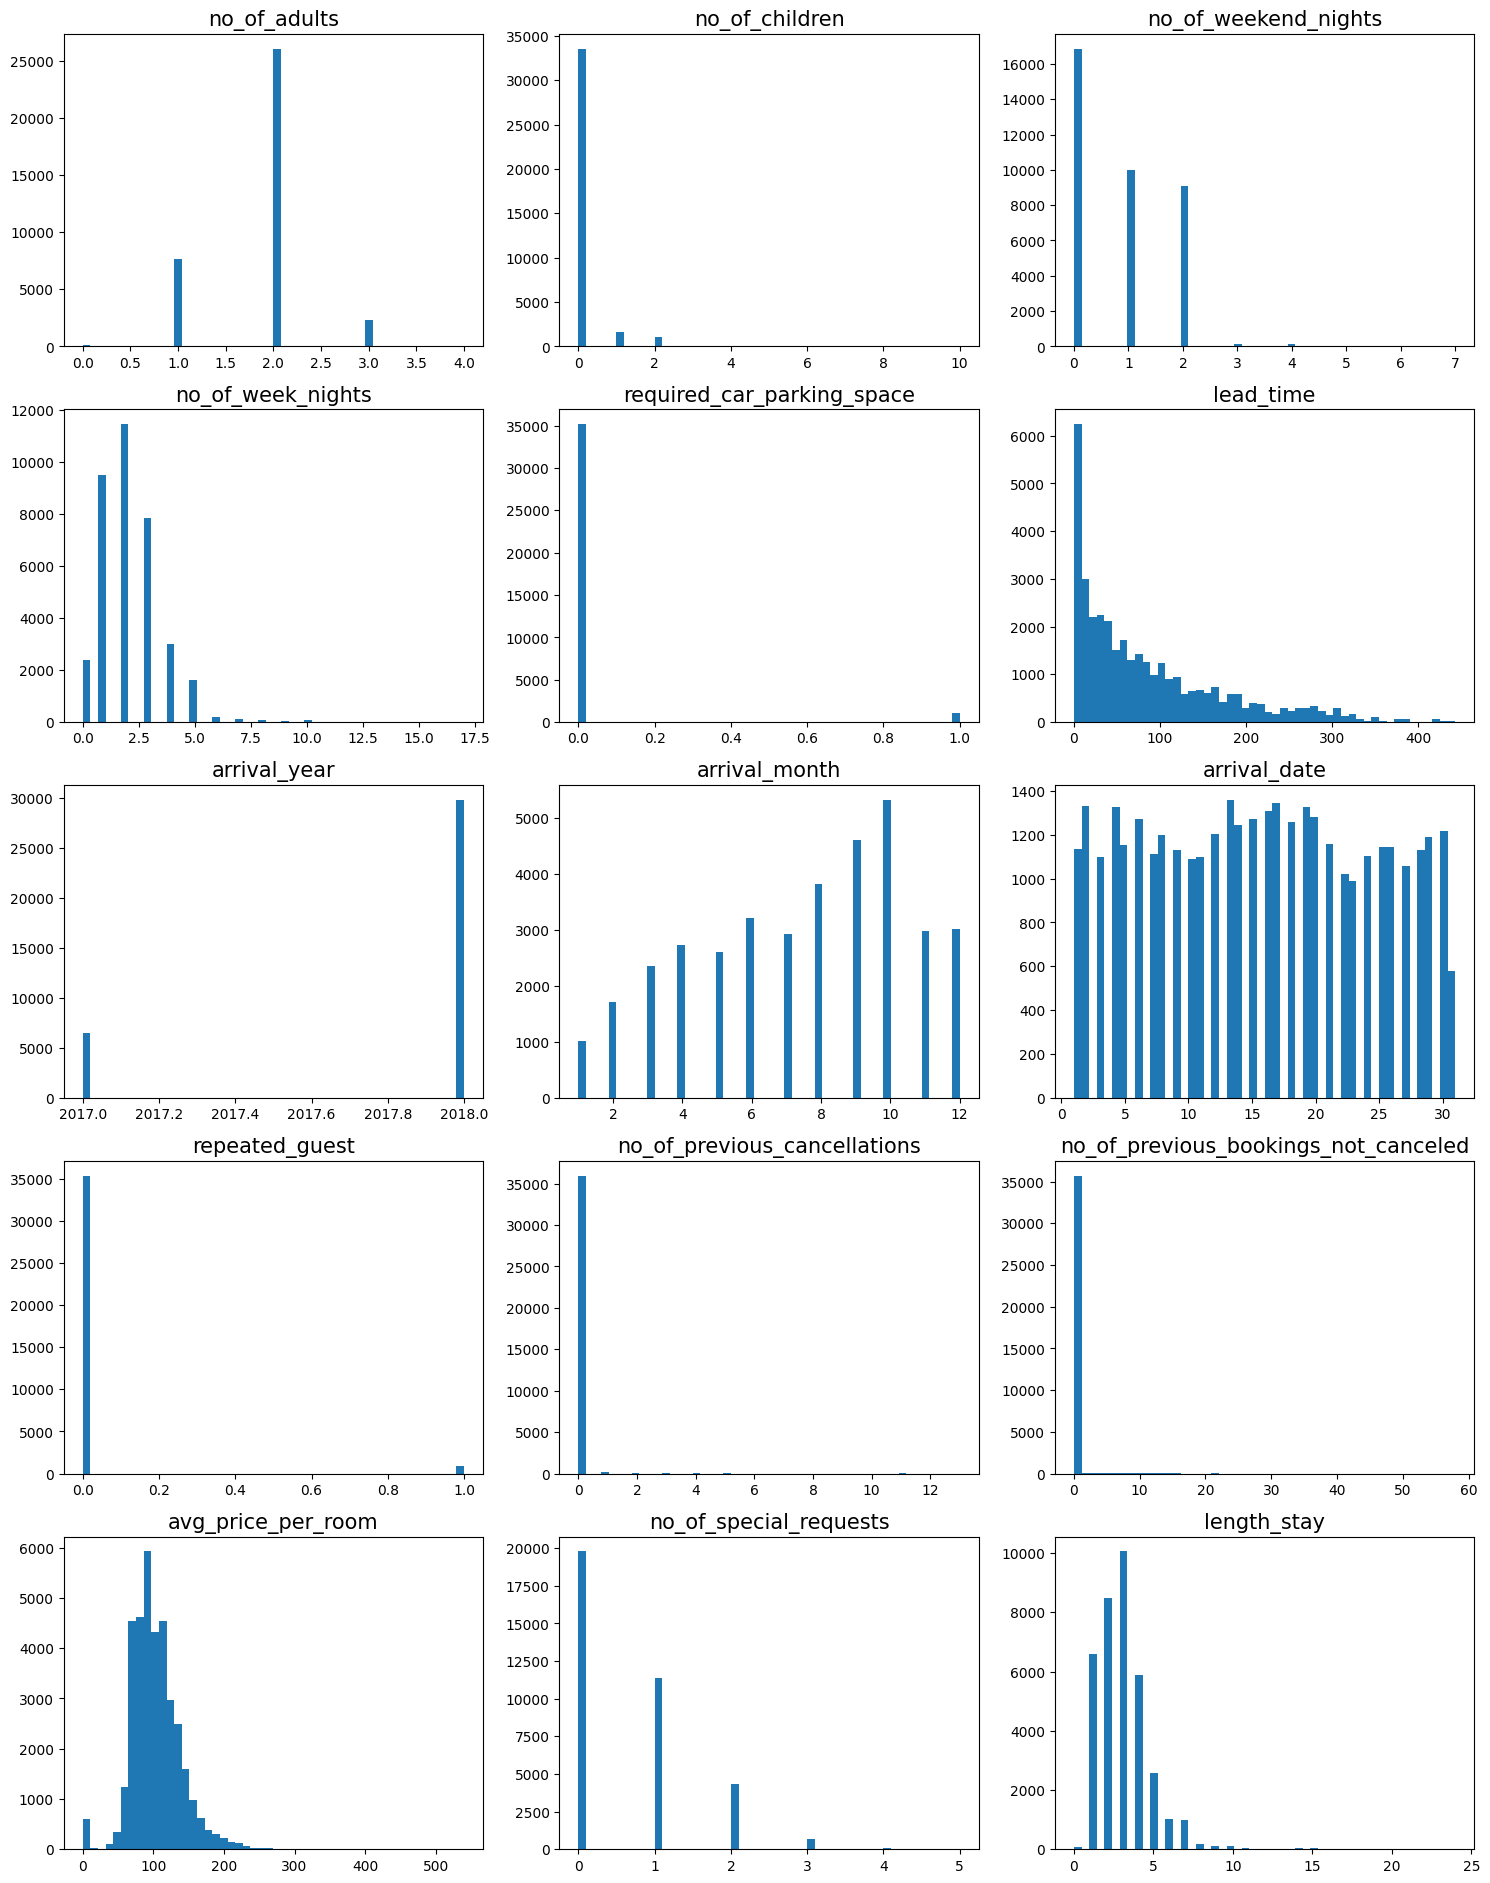

In [123]:
# creating a list of columns
dist_cols = [
item for item in data.select_dtypes(include=np.number).columns
 ]

plt.figure(figsize=(15, 45))
 # looping the list and ploting histograns
for i in range(len(dist_cols)):
     plt.subplot(12,3,i+1)
     plt.hist(data[dist_cols[i]],bins=50)
     plt.tight_layout()
     plt.title(dist_cols[i], fontsize=15)

plt.show()


In [124]:
data2 = data.copy()
# removing because they are close to normal
dist_cols.remove('no_of_week_nights')
dist_cols.remove('no_of_adults')
dist_cols.remove('length_stay')
dist_cols.remove('avg_price_per_room')
# removing becasue they are boolean or time related.
dist_cols.remove('arrival_year')
dist_cols.remove('required_car_parking_space')
dist_cols.remove('arrival_date')
dist_cols.remove('arrival_month')
dist_cols.remove('repeated_guest')
# removing lead_time
dist_cols.remove('lead_time')

In [125]:
# using log transforms on columns
for col in dist_cols:
    data2[col + "_log"] = np.log1p(data2[col] +1)

# dropping the original columns
data2.drop(dist_cols, axis=1, inplace=True)
data2.head()

no_of_adults  no_of_week_nights type_of_meal_plan  \
0             2                  2       Meal Plan 1   
1             2                  3      Not Selected   
2             1                  1       Meal Plan 1   
3             2                  2       Meal Plan 1   
4             2                  1      Not Selected   

   required_car_parking_space room_type_reserved  lead_time  arrival_year  \
0                           0        Room_Type 1        224          2017   
1                           0        Room_Type 1          5          2018   
2                           0        Room_Type 1          1          2018   
3                           0        Room_Type 1        211          2018   
4                           0        Room_Type 1         48          2018   

   arrival_month  arrival_date market_segment_type  repeated_guest  \
0             10             2             Offline               0   
1             11             6              Online               0   
2              2            28              Online               0   
3              5            20              Online               0   
4              4            11              Online               0   

   avg_price_per_room booking_status  length_stay  no_of_children_log  \
0               65.00          False            3            0.693147   
1              106.68          False            5            0.693147   
2               60.00           True            3            0.693147   
3              100.00           True            2            0.693147   
4               94.50           True            2            0.693147   

   no_of_weekend_nights_log  no_of_previous_cancellations_log  \
0                  1.098612                          0.693147   
1                  1.386294                          0.693147   
2                  1.386294                          0.693147   
3                  0.693147                          0.693147   
4                  1.098612                          0.693147   

   no_of_previous_bookings_not_canceled_log  no_of_special_requests_log  
0                                  0.693147                    0.693147  
1                                  0.693147                    1.098612  
2                                  0.693147                    0.693147  
3                                  0.693147                    0.693147  
4                                  0.693147                    0.693147

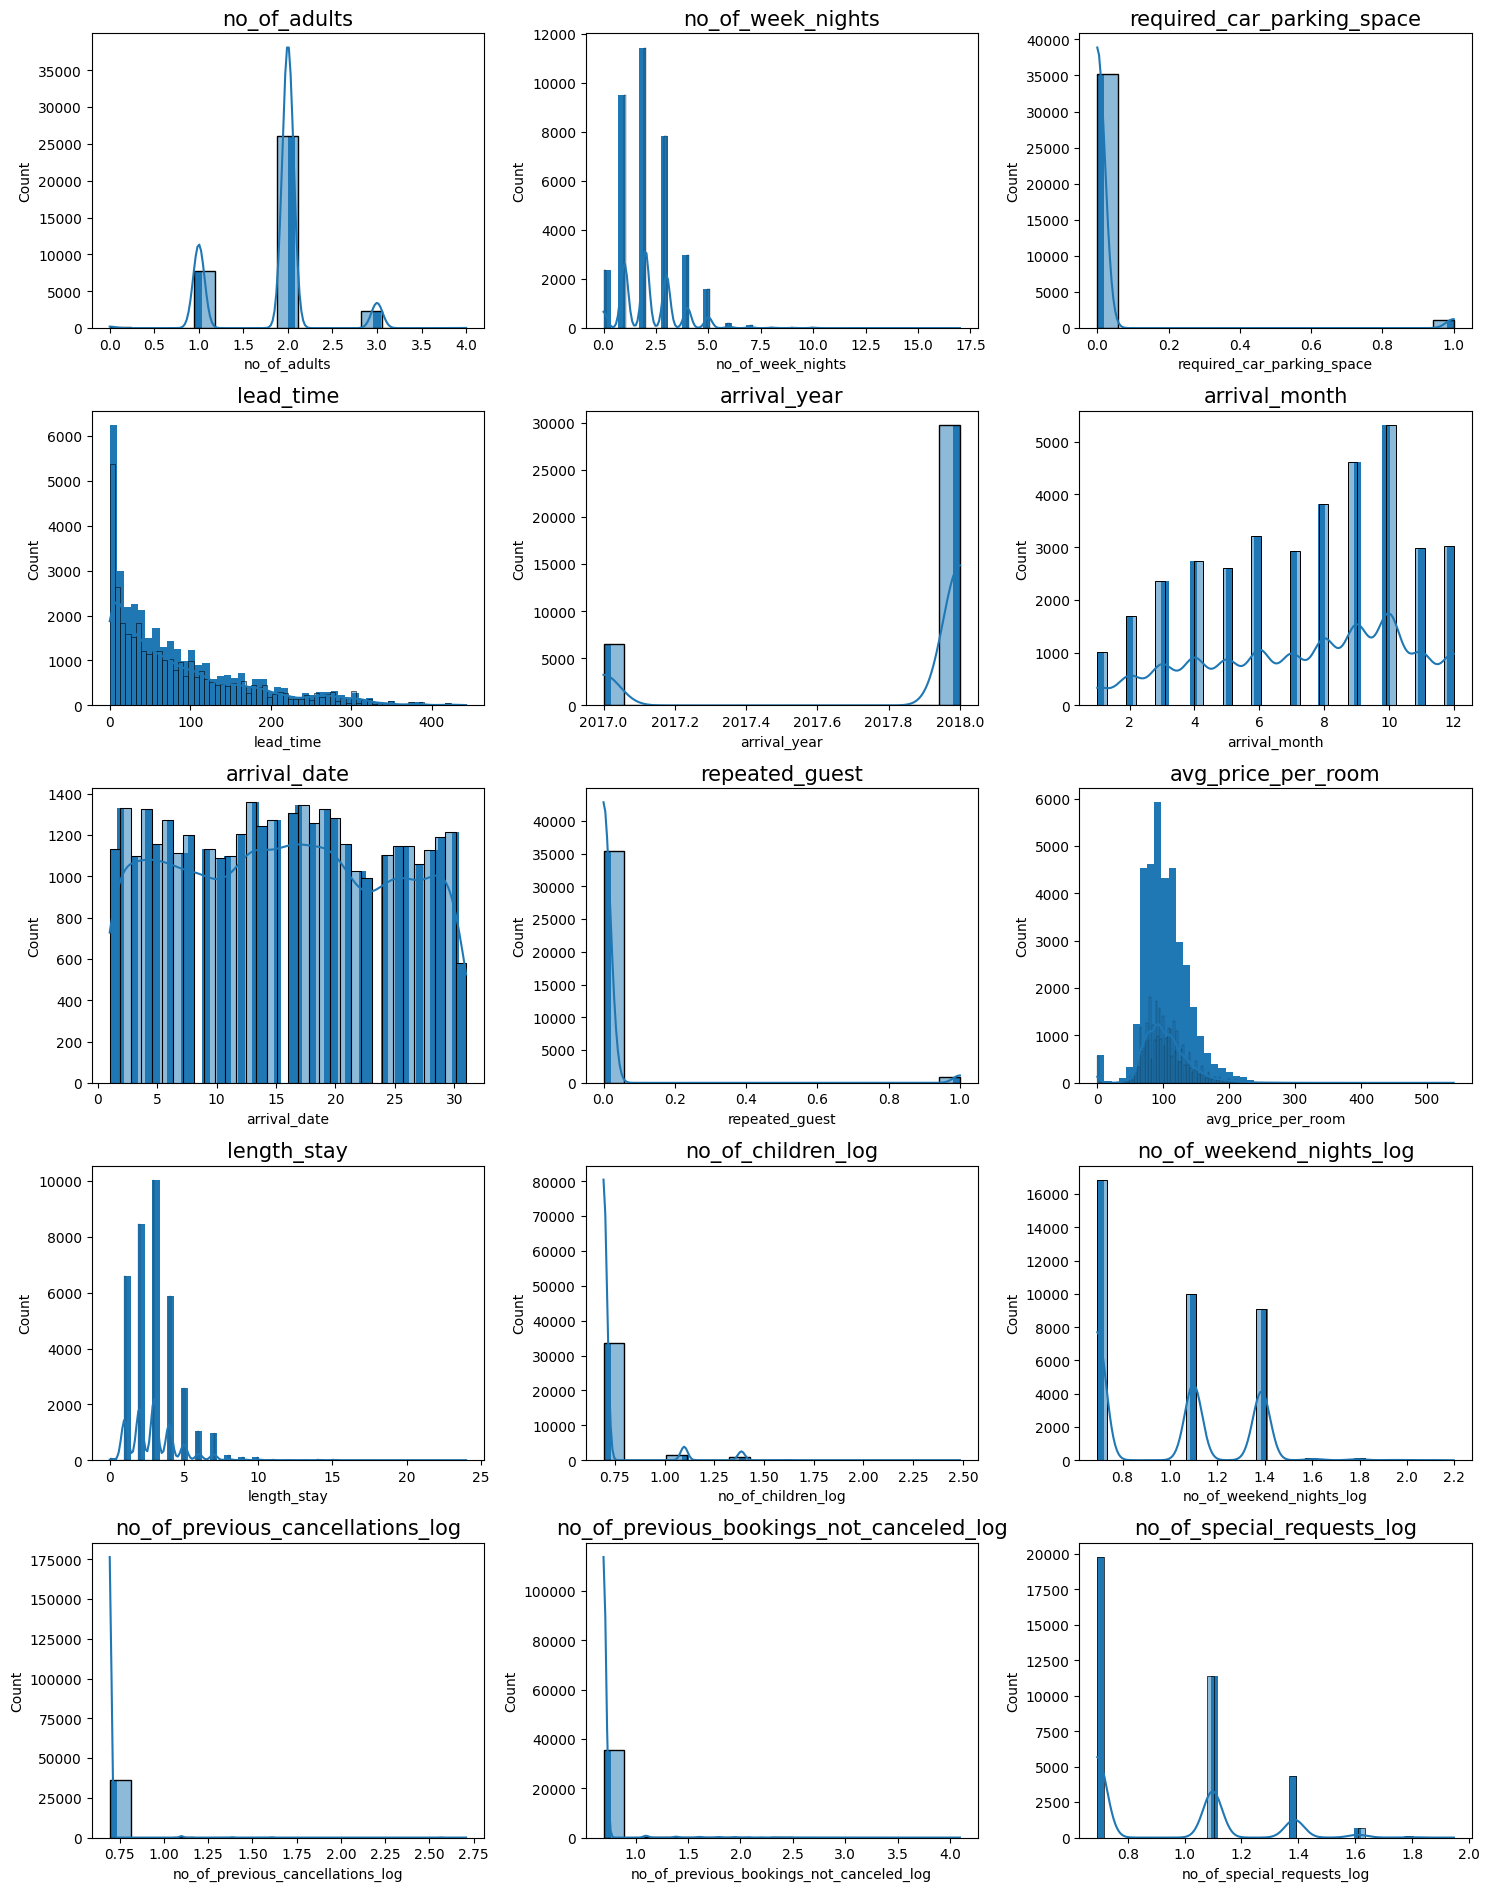

In [126]:
# viewing the distributions after the log transformation
dist_cols = [
    item for item in data2.select_dtypes(include=np.number).columns
]

#plot  histogram of all numeric columns

plt.figure(figsize=(15, 45))
for i in range(len(dist_cols)):
    plt.subplot(12, 3, i+1)
    plt.hist(data2[dist_cols[i]],bins=50)
    sns.histplot(data=data2, x=dist_cols[i], kde=True)
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=15)

plt.show()

In [127]:
# catergorical variables
dummy_data = pd.get_dummies (
    data2,
    columns = [
        'type_of_meal_plan',
        'room_type_reserved',
        'market_segment_type',
    ],
    drop_first=True,
)
dummy_data.head()

no_of_adults  no_of_week_nights  required_car_parking_space  lead_time  \
0             2                  2                           0        224   
1             2                  3                           0          5   
2             1                  1                           0          1   
3             2                  2                           0        211   
4             2                  1                           0         48   

   arrival_year  arrival_month  arrival_date  repeated_guest  \
0          2017             10             2               0   
1          2018             11             6               0   
2          2018              2            28               0   
3          2018              5            20               0   
4          2018              4            11               0   

   avg_price_per_room booking_status  length_stay  no_of_children_log  \
0               65.00          False            3            0.693147   
1              106.68          False            5            0.693147   
2               60.00           True            3            0.693147   
3              100.00           True            2            0.693147   
4               94.50           True            2            0.693147   

   no_of_weekend_nights_log  no_of_previous_cancellations_log  \
0                  1.098612                          0.693147   
1                  1.386294                          0.693147   
2                  1.386294                          0.693147   
3                  0.693147                          0.693147   
4                  1.098612                          0.693147   

   no_of_previous_bookings_not_canceled_log  no_of_special_requests_log  \
0                                  0.693147                    0.693147   
1                                  0.693147                    1.098612   
2                                  0.693147                    0.693147   
3                                  0.693147                    0.693147   
4                                  0.693147                    0.693147   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                          False                          False   
1                          False                          False   
2                          False                          False   
3                          False                          False   
4                          False                          False   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
0                           False                           False   
1                            True                           False   
2                           False                           False   
3                           False                           False   
4                            True                           False   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                           False                              False   
1                           False                              False   
2         

In [139]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   no_of_adults                              36275 non-null  int64  
 1   no_of_week_nights                         36275 non-null  int64  
 2   required_car_parking_space                36275 non-null  int64  
 3   lead_time                                 36275 non-null  int64  
 4   arrival_year                              36275 non-null  int64  
 5   arrival_month                             36275 non-null  int64  
 6   arrival_date                              36275 non-null  int64  
 7   repeated_guest                            36275 non-null  int64  
 8   avg_price_per_room                        36275 non-null  float64
 9   booking_status                            36275 non-null  object 
 10  length_stay                       

In [141]:
dummied_cut = pd.cut(dummy_data['lead_time'], 5, labels=['lat_min','short','med','long','advanced'])
dummied_cut.head(10)

0        med
1    lat_min
2    lat_min
3        med
4    lat_min
5       long
6    lat_min
7    lat_min
8      short
9    lat_min
Name: lead_time, dtype: category
Categories (5, object): ['lat_min' < 'short' < 'med' < 'long' < 'advanced']

In [145]:
data3 = pd.merge(dummy_data, dummied_cut, left_index=True, right_index=True)
data3.head().T

0         1         2  \
no_of_adults                                     2         2         1   
no_of_week_nights                                2         3         1   
required_car_parking_space                       0         0         0   
lead_time_x                                    224         5         1   
arrival_year                                  2017      2018      2018   
arrival_month                                   10        11         2   
arrival_date                                     2         6        28   
repeated_guest                                   0         0         0   
avg_price_per_room                            65.0    106.68      60.0   
booking_status                               False     False      True   
length_stay                                      3         5         3   
no_of_children_log                        0.693147  0.693147  0.693147   
no_of_weekend_nights_log                  1.098612  1.386294  1.386294   
no_of_previous_cancellations_log          0.693147  0.693147  0.693147   
no_of_previous_bookings_not_canceled_log  0.693147  0.693147  0.693147   
no_of_special_requests_log                0.693147  1.098612  0.693147   
type_of_meal_plan_Meal Plan 2                False     False     False   
type_of_meal_plan_Meal Plan 3                False     False     False   
type_of_meal_plan_Not Selected               False      True     False   
room_type_reserved_Room_Type 2               False     False     False   
room_type_reserved_Room_Type 3               False     False     False   
room_type_reserved_Room_Type 4               False     False     False   
room_type_reserved_Room_Type 5               False     False     False   
room_type_reserved_Room_Type 6               False     False     False   
room_type_reserved_Room_Type 7               False     False     False   
market_segment_type_Complementary            False     False     False   
market_segment_type_Corporate                False     False     False   
market_segment_type_Offline                   True     False     False   
market_segment_type_Online                   False      True      True   
lead_time_y                                    med   lat_min   lat_min   

                                                 3         4  
no_of_adults                                     2         2  
no_of_week_nights                                2         1  
required_car_parking_space                       0         0  
lead_time_x                                    211        48  
arrival_year                                  2018      2018  
arrival_month                                    5         4  
arrival_date                                    20        11  
repeated_guest                                   0         0  
avg_price_per_room                           100.0      94.5  
booking_status                                True      True  
length_stay                                      2         2  
no_of_children_log                        0.693147  0.693147  
no_of_weekend_nights_log                  0.693147  1.098612  
no_of_previous_cancellations_log          0.693147  0.693147  
no_of_previous_bookings_not_canceled_log  0.693147  0.693147  
no_of_special_requests_log                0.693147  0.693147  
type_of_meal_plan_Meal Plan 2                False     False  
type_of_meal_plan_Meal Plan 3                False     False  
type_of_meal_plan_Not Selected               False      True  
room_type_reserved_Room_Type 2               False     False  
room_type_reserved_Room_Type 3               False     False  
room_type_reserved_Room_Type 4               False     False  
room_type_reserved_Room_Type 5               False     False  
room_type_reserved_Room_Type 6               False     False  
room_type_reserved_Room_Type 7               False     False  
market_segment_type_Complementary            False     False  
market_segment_type_Corporate                False   

In [146]:
# dropping time variables.
data3_5 = data3.drop(['lead_time_x','arrival_date', 'arrival_year'], axis=1)

In [147]:
data4 = pd.get_dummies (
    data3_5,
    columns = [
        'lead_time_y',
    ],
    drop_first=True,
)
data4.head().T

0         1         2  \
no_of_adults                                     2         2         1   
no_of_week_nights                                2         3         1   
required_car_parking_space                       0         0         0   
arrival_month                                   10        11         2   
repeated_guest                                   0         0         0   
avg_price_per_room                            65.0    106.68      60.0   
booking_status                               False     False      True   
length_stay                                      3         5         3   
no_of_children_log                        0.693147  0.693147  0.693147   
no_of_weekend_nights_log                  1.098612  1.386294  1.386294   
no_of_previous_cancellations_log          0.693147  0.693147  0.693147   
no_of_previous_bookings_not_canceled_log  0.693147  0.693147  0.693147   
no_of_special_requests_log                0.693147  1.098612  0.693147   
type_of_meal_plan_Meal Plan 2                False     False     False   
type_of_meal_plan_Meal Plan 3                False     False     False   
type_of_meal_plan_Not Selected               False      True     False   
room_type_reserved_Room_Type 2               False     False     False   
room_type_reserved_Room_Type 3               False     False     False   
room_type_reserved_Room_Type 4               False     False     False   
room_type_reserved_Room_Type 5               False     False     False   
room_type_reserved_Room_Type 6               False     False     False   
room_type_reserved_Room_Type 7               False     False     False   
market_segment_type_Complementary            False     False     False   
market_segment_type_Corporate                False     False     False   
market_segment_type_Offline                   True     False     False   
market_segment_type_Online                   False      True      True   
lead_time_y_short                            False     False     False   
lead_time_y_med                               True     False     False   
lead_time_y_long                             False     False     False   
lead_time_y_advanced                         False     False     False   

                                                 3         4  
no_of_adults                                     2         2  
no_of_week_nights                                2         1  
required_car_parking_space                       0         0  
arrival_month                                    5         4  
repeated_guest                                   0         0  
avg_price_per_room                           100.0      94.5  
booking_status                                True      True  
length_stay                                      2         2  
no_of_children_log                        0.693147  0.693147  
no_of_weekend_nights_log                  0.693147  1.098612  
no_of_previous_cancellations_log          0.693147  0.693147  
no_of_previous_bookings_not_canceled_log  0.693147  0.693147  
no_of_special_requests_log                0.693147  0.693147  
type_of_meal_plan_Meal Plan 2                False     False  
type_of_meal_plan_Meal Plan 3                False     False  
type_of_meal_plan_Not Selected               False      True  
room_type_reserved_Room_Type 2               False     False  
room_type_reserved_Room_Type 3               False     False  
room_type_reserved_Room_Type 4               False     False  
room_type_reserved_Room_Type 5               False     False  
room_type_reserved_Room_Type 6               False     False  
room_type_reserved_Room_Type 7               False     False  
market_segment_type_Complementary            False     False  
market_segment_type_Corporate                False     False  
market_segment_type_Offline                  False     False  
market_segment_type_Online                    True      True  
lead_time_y_short                            False   

In [148]:
data4 = data4.astype(float)

In [149]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   no_of_adults                              36275 non-null  float64
 1   no_of_week_nights                         36275 non-null  float64
 2   required_car_parking_space                36275 non-null  float64
 3   arrival_month                             36275 non-null  float64
 4   repeated_guest                            36275 non-null  float64
 5   avg_price_per_room                        36275 non-null  float64
 6   booking_status                            36275 non-null  float64
 7   length_stay                               36275 non-null  float64
 8   no_of_children_log                        36275 non-null  float64
 9   no_of_weekend_nights_log                  36275 non-null  float64
 10  no_of_previous_cancellations_log  

In [150]:
# the train test data first.
X = data4.drop("booking_status" , axis=1)
y = data4.pop("booking_status")

# adding a contstant to X variable
X = add_constant(X)


In [151]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 29020
Number of rows in test data = 7255


In [153]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, 25629 to 15795
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   const                                     29020 non-null  float64
 1   no_of_adults                              29020 non-null  float64
 2   no_of_week_nights                         29020 non-null  float64
 3   required_car_parking_space                29020 non-null  float64
 4   arrival_month                             29020 non-null  float64
 5   repeated_guest                            29020 non-null  float64
 6   avg_price_per_room                        29020 non-null  float64
 7   length_stay                               29020 non-null  float64
 8   no_of_children_log                        29020 non-null  float64
 9   no_of_weekend_nights_log                  29020 non-null  float64
 10  no_of_previous_cancellations_log   

## EDA

- It is a good idea to explore the data once again after manipulating it.

<Axes: >

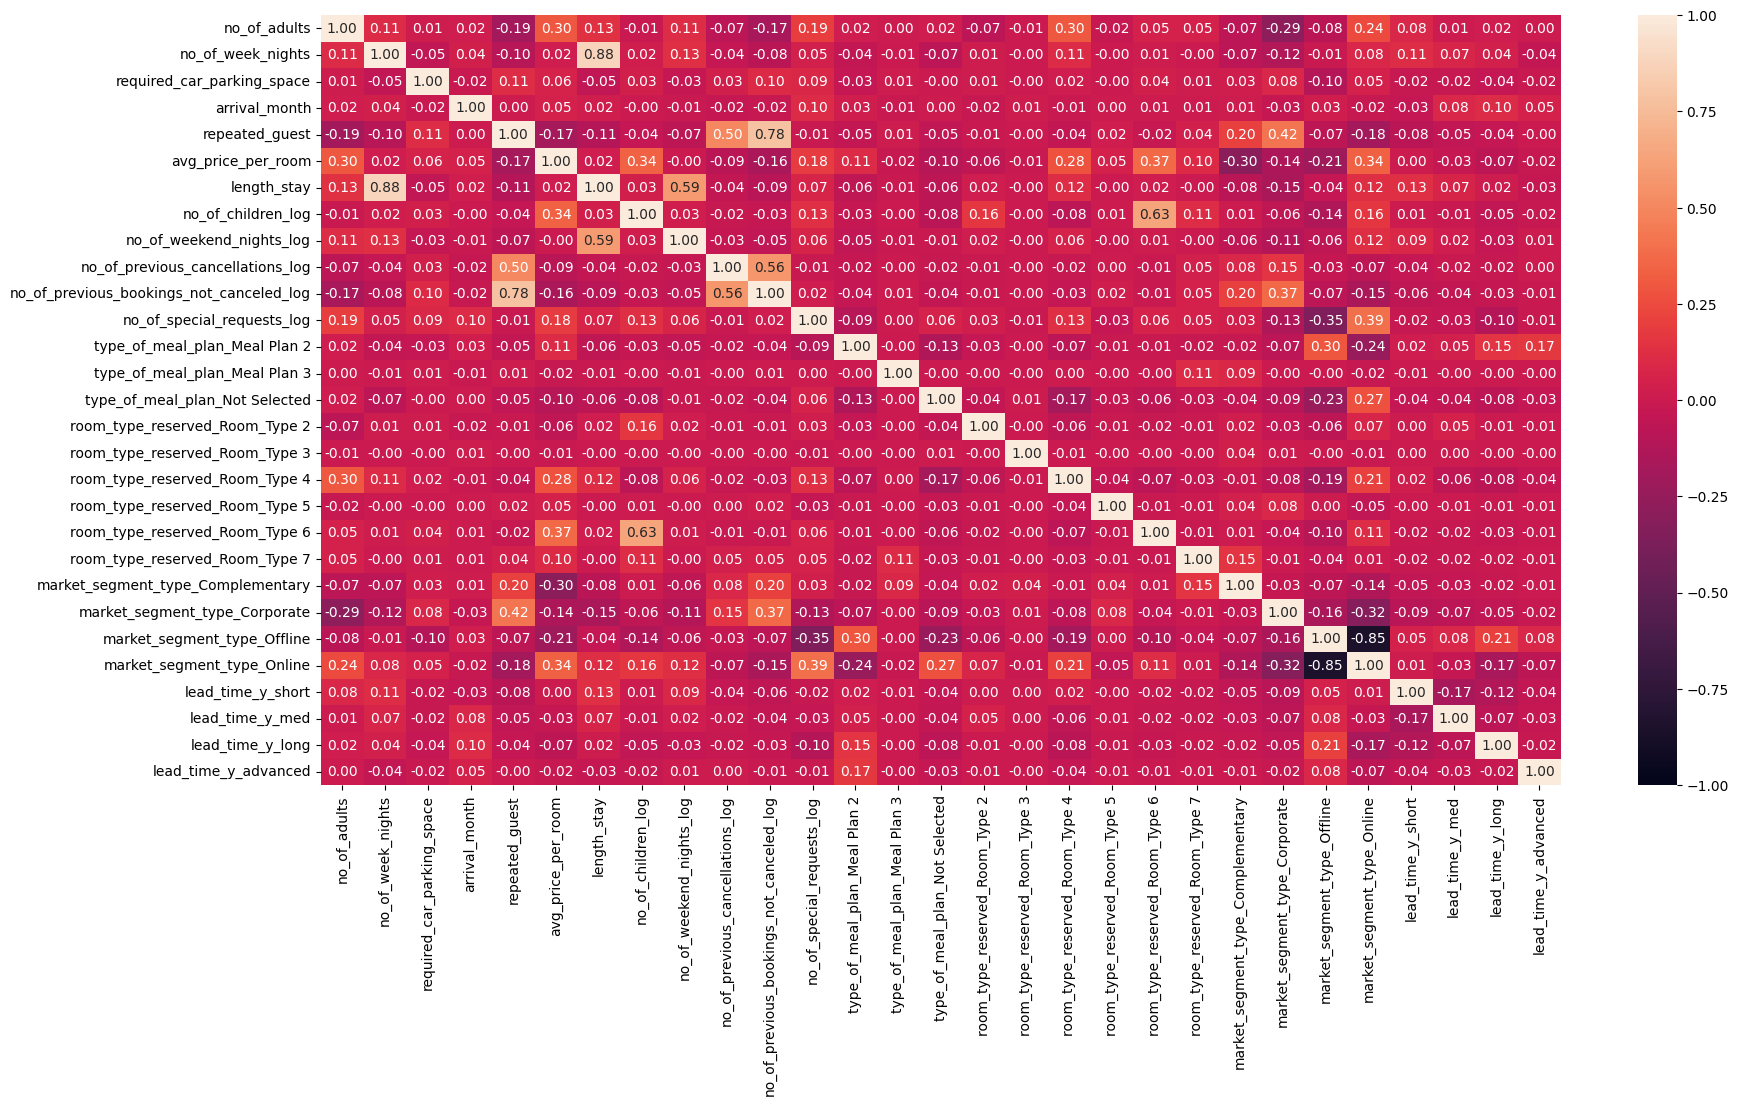

In [155]:
plt.figure(figsize=(20,10))
sns.heatmap(
data4.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f')

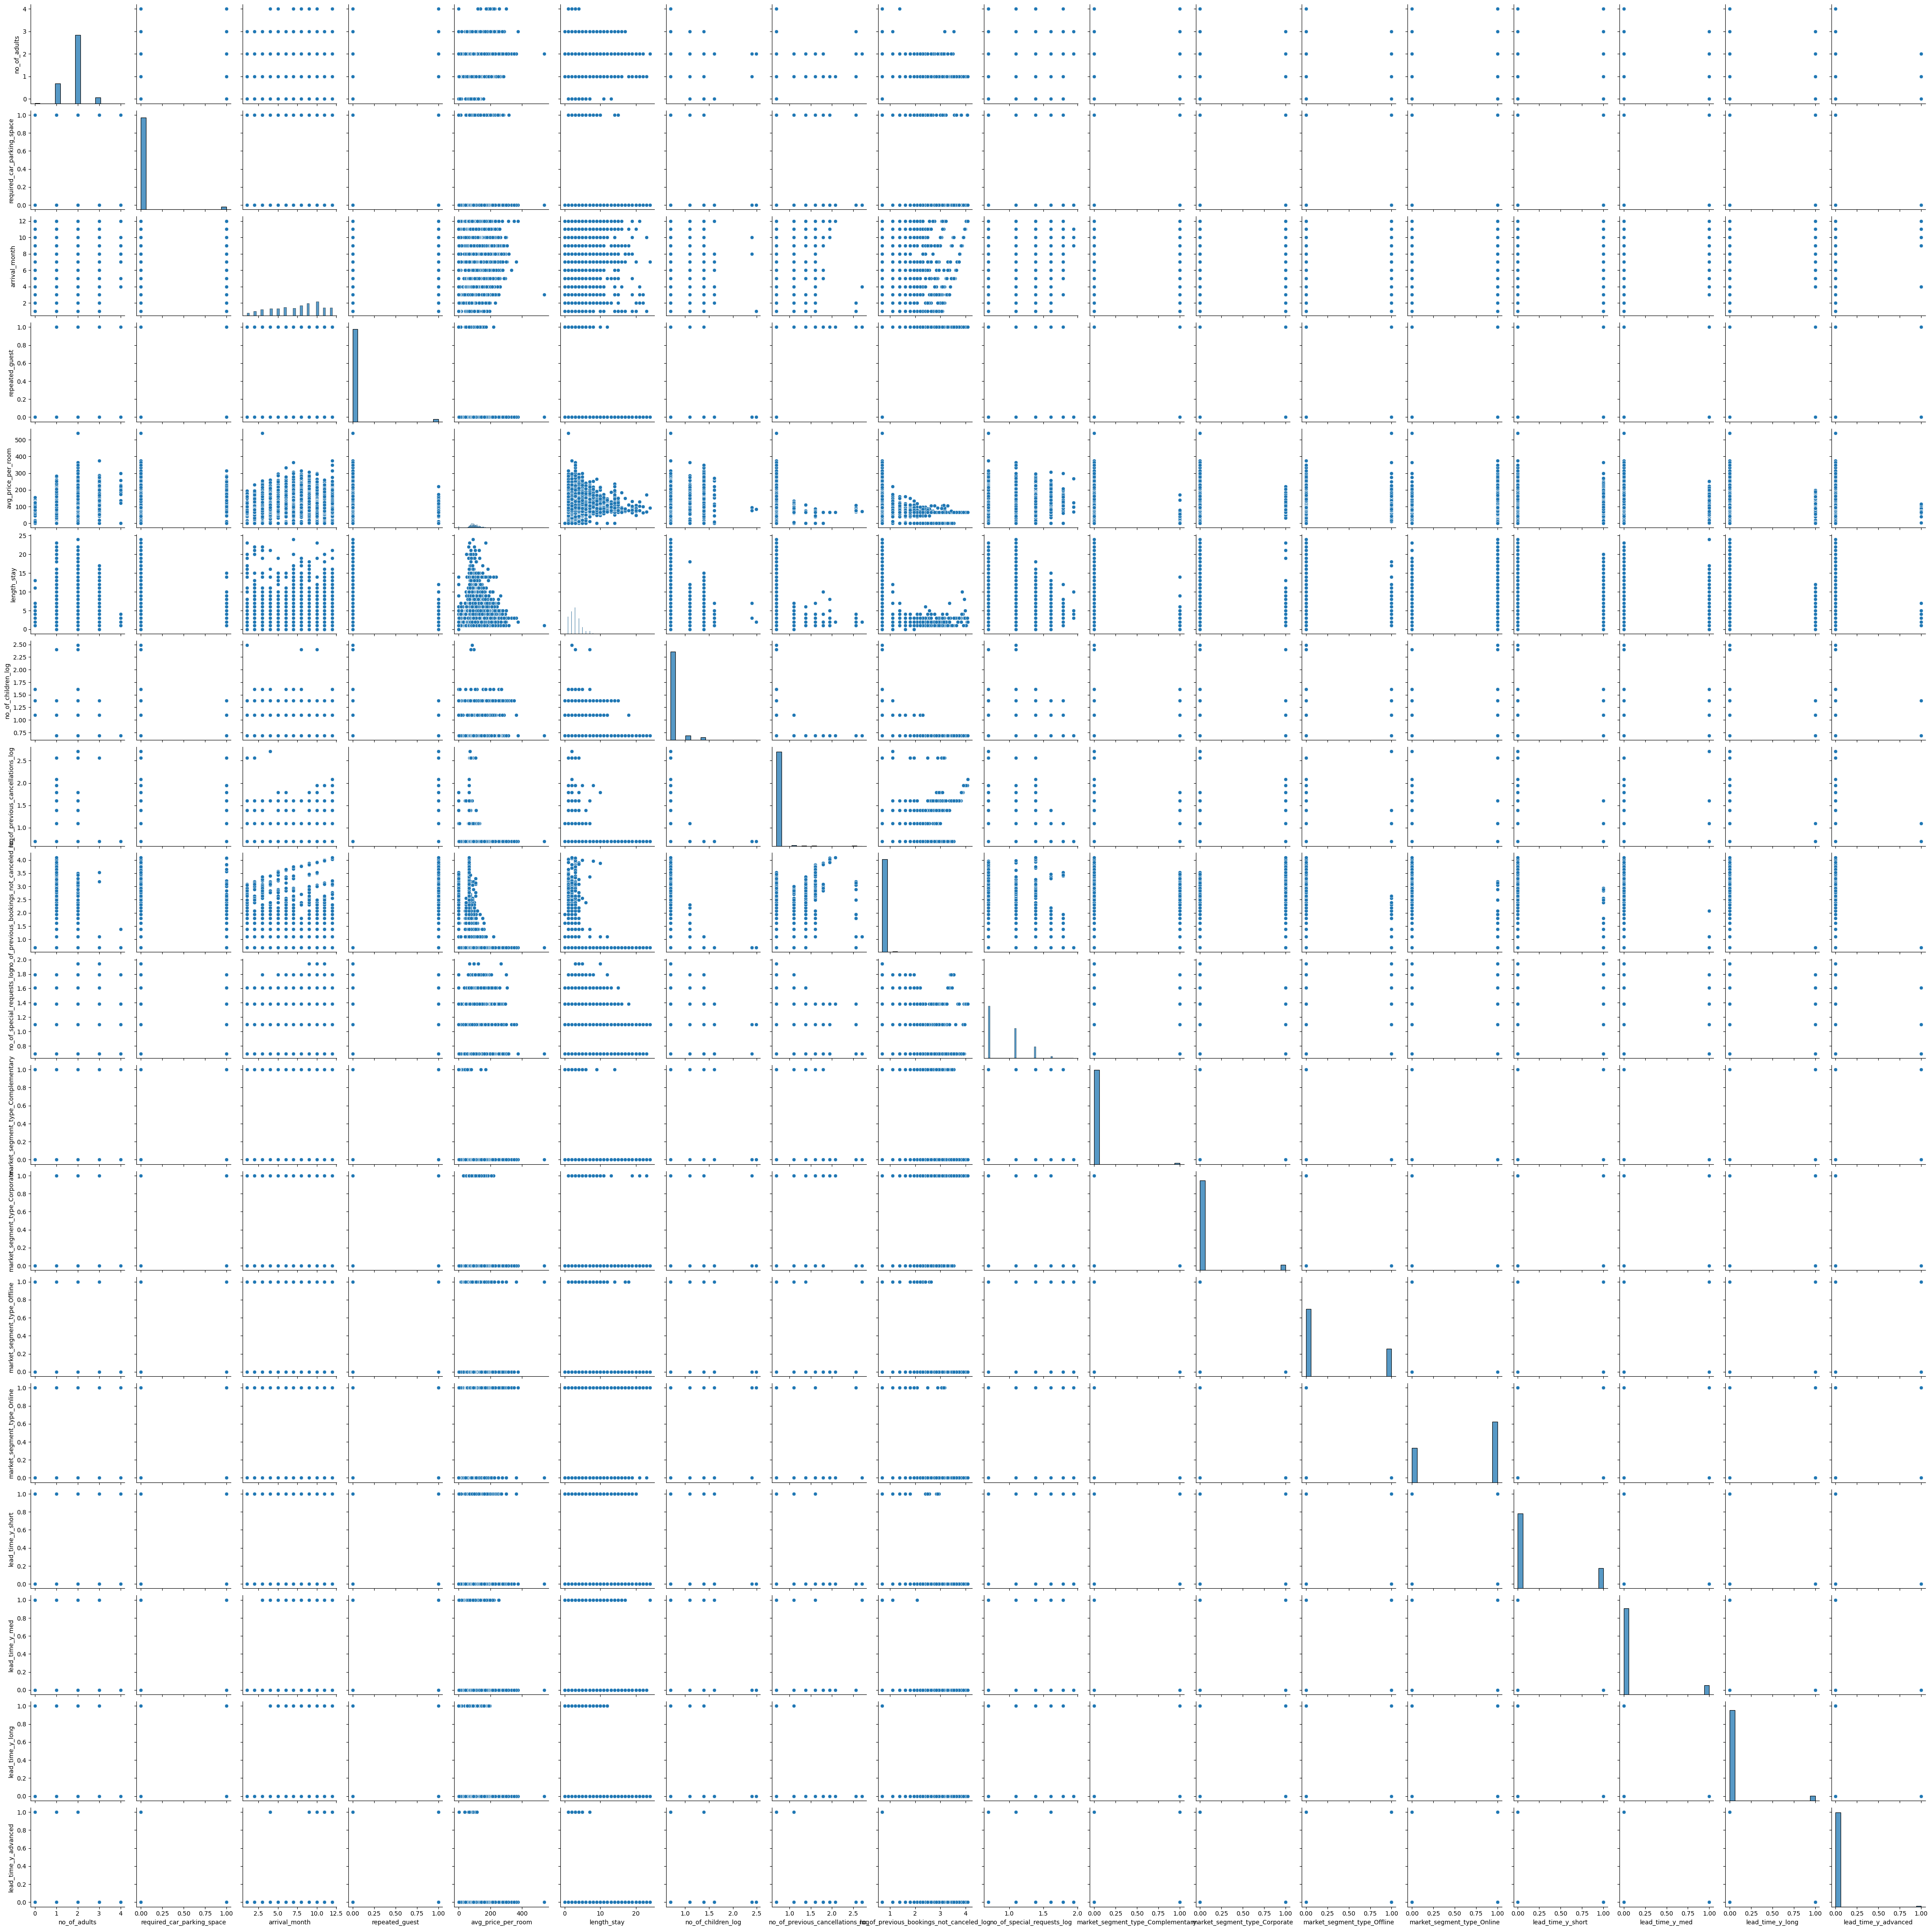

In [157]:
sns.pairplot(data4[['no_of_adults',
 'required_car_parking_space',
 'arrival_month',
 'repeated_guest',
 'avg_price_per_room',
 'length_stay',
 'no_of_children_log',
 'no_of_previous_cancellations_log',
 'no_of_previous_bookings_not_canceled_log',
 'no_of_special_requests_log',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online',
 'lead_time_y_short',
 'lead_time_y_med',
 'lead_time_y_long',
 'lead_time_y_advanced']]);

**EDA Insights**
1. Online booked rooms have the highest cost of booking.
2. Late Summer is the busiest time of the year for the hotel chain.
3. Nearly 2/3 of bookings come from online sources.
4. Typically, rooms rent for around 100 plus or minus 25.
5. Guest who make special request for their stay, are significantly less likely to cancel the reservation.
6. 72% of adults who book rooms have another adult staying with them.
7. Children are rare at the hotels and 92.6% of booking don’t include children in the rooms.
8. 52.6% of bookings include at least one weekend night.
9. Breakfast plan is the most popular..


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [158]:
# let's check the VIF of the predictor
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                       834.261073
no_of_adults                                  1.341576
no_of_week_nights                           193.304696
required_car_parking_space                    1.041068
arrival_month                                 1.051504
repeated_guest                                2.847785
avg_price_per_room                            1.934505
length_stay                                 287.553100
no_of_children_log                            1.910321
no_of_weekend_nights_log                     68.425417
no_of_previous_cancellations_log              1.535978
no_of_previous_bookings_not_canceled_log      2.993684
no_of_special_requests_log                    1.265732
type_of_meal_plan_Meal Plan 2                 1.212041
type_of_meal_plan_Meal Plan 3                 1.014148
type_of_meal_plan_Not Selected                1.240739
room_type_reserved_Room_Type 2                1.087549
room_type_reserved_Room_Type 3                1.003

In [159]:
# dropping the number of weekend & week night because  i have combained them into one & market segments because they all have large multi value
x_train1 = x_train.drop(['no_of_weekend_nights_log',
                         'no_of_week_nights',
                         'market_segment_type_Online',
                         'market_segment_type_Offline',
                         'market_segment_type_Corporate',
                        'market_segment_type_Complementary'],
                       axis=1)

## Building a Logistic Regression model

In [160]:
logit = sm.Logit(y_train, x_train1.astype(float)).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.460614
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    28996
Method:                           MLE   Df Model:                           23
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.2706
Time:                        20:50:39   Log-Likelihood:                -13367.
converged:                       True   LL-Null:                       -18327.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.7560      0.435     -6.334      0.000      -3.609      -1.903
no_of_adults                                 0.2461      0.033      7.465      0.000       0.181       0.311
required_car_parking_space                  -1.4865      0.129    -11.518      0.000      -1.740      -1.234
arrival_month                               -0.0660      0.005    -12.259      0.000      -0.076      -0.055
repeated_guest                              -2.5765      0.532     -4.842      0.000      -3.619      -1.534
avg_price_per_room                           0.0228      0.001     36.055      0.000       0.022       0.024
length_stay                                  0.1161      0.009     13.436      0.000       0.099       0.133
no_of_children_log                           0.8147      0.145      5.626      0.000       0.531       1.098
no_of_previous_cancellations_log             1.4853      0.497      2.988      0.003       0.511       2.460
no_of_previous_bookings_not_canceled_log    -0.4811      0.499     -0.965      0.335      -1.458       0.496
no_of_special_requests_log                  -3.2166      0.068    -47.388      0.000      -3.350      -3.084
type_of_meal_plan_Meal Plan 2               -0.3154      0.053     -5.955      0.000      -0.419      -0.212
type_of_meal_plan_Meal Plan 3                1.7119      2.879      0.595      0.552      -3.931       7.355
type_of_meal_plan_Not Selected               0.8094      0.045     17.976      0.000       0.721       0.898
room_type_reserved_Room_Type 2               0.0980      0.116      0.847      0.397      -0.129       0.325
room_type_reserved_Room_Type 3              -0.4403      1.308     -0.337      0.736      -3.004       2.124
room_type_reserved_Room_Type 4               0.0543      0.047      1.159      0.246      -0.038       0.146
room_type_reserved_Room_Type 5              -0.8687      0.180     -4.833      0.000      -1.221      -0.516
room_type_reserved_Room_Type 6              -1.0992      0.129     -8.510      0.000      -1.352      -0.846
room_type_reserved_Room_Type 7              -1.7658      0.277     -6.373      0.000      -2.309      -1.223
lead_time_y_short                            1.3149      0.036     36.224      0.000       1.244       1.386
lead_time_y_med                              2.8013      0.054     52.064      0.000       2.696       2.907
lead_time_y_long                             3.0378      0.073     41.688      0.000       2.895       3.181
lead_time_y_advanced                         4.5385      0.235     19.286      0.000       4.077       5.000
============================================================================================================
"""

In [161]:
vif_series = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index=x_train1.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                       181.913628
no_of_adults                                  1.276251
required_car_parking_space                    1.036220
arrival_month                                 1.045303
repeated_guest                                2.704601
avg_price_per_room                            1.577441
length_stay                                   1.078990
no_of_children_log                            1.901144
no_of_previous_cancellations_log              1.514158
no_of_previous_bookings_not_canceled_log      2.944955
no_of_special_requests_log                    1.135144
type_of_meal_plan_Meal Plan 2                 1.129908
type_of_meal_plan_Meal Plan 3                 1.009422
type_of_meal_plan_Not Selected                1.107915
room_type_reserved_Room_Type 2                1.075407
room_type_reserved_Room_Type 3                1.000657
room_type_reserved_Room_Type 4                1.313223
room_type_reserved_Room_Type 5                1.015

In [162]:
# test performance
pred_train = logit.predict(x_train1) > 0.5
pred_train = np.round(pred_train)

In [163]:
X_train2 = x_train1.drop(['room_type_reserved_Room_Type 3'], axis=1)
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29020 entries, 25629 to 15795
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   const                                     29020 non-null  float64
 1   no_of_adults                              29020 non-null  float64
 2   required_car_parking_space                29020 non-null  float64
 3   arrival_month                             29020 non-null  float64
 4   repeated_guest                            29020 non-null  float64
 5   avg_price_per_room                        29020 non-null  float64
 6   length_stay                               29020 non-null  float64
 7   no_of_children_log                        29020 non-null  float64
 8   no_of_previous_cancellations_log          29020 non-null  float64
 9   no_of_previous_bookings_not_canceled_log  29020 non-null  float64
 10  no_of_special_requests_log         

In [164]:
logit2 = sm.Logit(y_train, X_train2.astype(float)).fit()
logit2.summary()

Optimization terminated successfully.
         Current function value: 0.460616
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    28997
Method:                           MLE   Df Model:                           22
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.2706
Time:                        20:50:57   Log-Likelihood:                -13367.
converged:                       True   LL-Null:                       -18327.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.7560      0.435     -6.334      0.000      -3.609      -1.903
no_of_adults                                 0.2461      0.033      7.464      0.000       0.181       0.311
required_car_parking_space                  -1.4865      0.129    -11.517      0.000      -1.739      -1.234
arrival_month                               -0.0660      0.005    -12.262      0.000      -0.077      -0.055
repeated_guest                              -2.5764      0.532     -4.842      0.000      -3.619      -1.534
avg_price_per_room                           0.0228      0.001     36.056      0.000       0.022       0.024
length_stay                                  0.1161      0.009     13.438      0.000       0.099       0.133
no_of_children_log                           0.8148      0.145      5.627      0.000       0.531       1.099
no_of_previous_cancellations_log             1.4853      0.497      2.988      0.003       0.511       2.459
no_of_previous_bookings_not_canceled_log    -0.4811      0.499     -0.965      0.335      -1.458       0.496
no_of_special_requests_log                  -3.2165      0.068    -47.387      0.000      -3.350      -3.083
type_of_meal_plan_Meal Plan 2               -0.3153      0.053     -5.953      0.000      -0.419      -0.211
type_of_meal_plan_Meal Plan 3                1.7120      2.879      0.595      0.552      -3.931       7.355
type_of_meal_plan_Not Selected               0.8095      0.045     17.978      0.000       0.721       0.898
room_type_reserved_Room_Type 2               0.0981      0.116      0.847      0.397      -0.129       0.325
room_type_reserved_Room_Type 4               0.0544      0.047      1.161      0.246      -0.037       0.146
room_type_reserved_Room_Type 5              -0.8686      0.180     -4.832      0.000      -1.221      -0.516
room_type_reserved_Room_Type 6              -1.0992      0.129     -8.510      0.000      -1.352      -0.846
room_type_reserved_Room_Type 7              -1.7658      0.277     -6.373      0.000      -2.309      -1.223
lead_time_y_short                            1.3147      0.036     36.223      0.000       1.244       1.386
lead_time_y_med                              2.8013      0.054     52.065      0.000       2.696       2.907
lead_time_y_long                             3.0379      0.073     41.689      0.000       2.895       3.181
lead_time_y_advanced                         4.5385      0.235     19.286      0.000       4.077       5.000
============================================================================================================
"""

In [165]:
x_train3 = X_train2.drop(['no_of_previous_bookings_not_canceled_log'], axis=1)


In [166]:
logit3 = sm.Logit(y_train, x_train3.astype(float)).fit()
logit3.summary()

Optimization terminated successfully.
         Current function value: 0.460635
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    28998
Method:                           MLE   Df Model:                           21
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.2706
Time:                        20:51:11   Log-Likelihood:                -13368.
converged:                       True   LL-Null:                       -18327.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.9881      0.339     -8.819      0.000      -3.652      -2.324
no_of_adults                         0.2465      0.033      7.476      0.000       0.182       0.311
required_car_parking_space          -1.4868      0.129    -11.520      0.000      -1.740      -1.234
arrival_month                       -0.0659      0.005    -12.259      0.000      -0.076      -0.055
repeated_guest                      -2.8099      0.485     -5.794      0.000      -3.760      -1.859
avg_price_per_room                   0.0228      0.001     36.069      0.000       0.022       0.024
length_stay                          0.1161      0.009     13.440      0.000       0.099       0.133
no_of_children_log                   0.8151      0.145      5.629      0.000       0.531       1.099
no_of_previous_cancellations_log     1.3372      0.450      2.974      0.003       0.456       2.218
no_of_special_requests_log          -3.2178      0.068    -47.410      0.000      -3.351      -3.085
type_of_meal_plan_Meal Plan 2       -0.3156      0.053     -5.958      0.000      -0.419      -0.212
type_of_meal_plan_Meal Plan 3        1.7126      2.881      0.594      0.552      -3.934       7.359
type_of_meal_plan_Not Selected       0.8098      0.045     17.983      0.000       0.722       0.898
room_type_reserved_Room_Type 2       0.0981      0.116      0.848      0.397      -0.129       0.325
room_type_reserved_Room_Type 4       0.0542      0.047      1.157      0.247      -0.038       0.146
room_type_reserved_Room_Type 5      -0.8695      0.180     -4.838      0.000      -1.222      -0.517
room_type_reserved_Room_Type 6      -1.0998      0.129     -8.514      0.000      -1.353      -0.847
room_type_reserved_Room_Type 7      -1.7668      0.277     -6.376      0.000      -2.310      -1.224
lead_time_y_short                    1.3150      0.036     36.229      0.000       1.244       1.386
lead_time_y_med                      2.8024      0.054     52.088      0.000       2.697       2.908
lead_time_y_long                     3.0386      0.073     41.694      0.000       2.896       3.181
lead_time_y_advanced                 4.5467      0.236     19.291      0.000       4.085       5.009
====================================================================================================
"""

In [167]:
vif_series = pd.Series(
    [variance_inflation_factor(x_train3.values, i) for i in range(x_train3.shape[1])],
    index=x_train3.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                               175.817619
no_of_adults                          1.273740
required_car_parking_space            1.035127
arrival_month                         1.044396
repeated_guest                        1.465019
avg_price_per_room                    1.574018
length_stay                           1.078836
no_of_children_log                    1.901014
no_of_previous_cancellations_log      1.343447
no_of_special_requests_log            1.130055
type_of_meal_plan_Meal Plan 2         1.129777
type_of_meal_plan_Meal Plan 3         1.009408
type_of_meal_plan_Not Selected        1.107794
room_type_reserved_Room_Type 2        1.075386
room_type_reserved_Room_Type 4        1.312711
room_type_reserved_Room_Type 5        1.014418
room_type_reserved_Room_Type 6        1.863570
room_type_reserved_Room_Type 7        1.061215
lead_time_y_short                     1.104778
lead_time_y_med                       1.091840
lead_time_y_long                      1.116088

In [168]:
x_train4 = x_train3.drop(['room_type_reserved_Room_Type 2'], axis=1)

In [169]:
logit4 = sm.Logit(y_train, x_train4.astype(float)).fit()
logit4.summary()

Optimization terminated successfully.
         Current function value: 0.460647
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    28999
Method:                           MLE   Df Model:                           20
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.2706
Time:                        20:51:24   Log-Likelihood:                -13368.
converged:                       True   LL-Null:                       -18327.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -2.9998      0.339     -8.860      0.000      -3.663      -2.336
no_of_adults                         0.2455      0.033      7.450      0.000       0.181       0.310
required_car_parking_space          -1.4839      0.129    -11.508      0.000      -1.737      -1.231
arrival_month                       -0.0661      0.005    -12.288      0.000      -0.077      -0.056
repeated_guest                      -2.8119      0.485     -5.798      0.000      -3.762      -1.861
avg_price_per_room                   0.0228      0.001     36.083      0.000       0.022       0.024
length_stay                          0.1162      0.009     13.454      0.000       0.099       0.133
no_of_children_log                   0.8407      0.142      5.934      0.000       0.563       1.118
no_of_previous_cancellations_log     1.3364      0.450      2.971      0.003       0.455       2.218
no_of_special_requests_log          -3.2162      0.068    -47.407      0.000      -3.349      -3.083
type_of_meal_plan_Meal Plan 2       -0.3171      0.053     -5.990      0.000      -0.421      -0.213
type_of_meal_plan_Meal Plan 3        1.7139      2.880      0.595      0.552      -3.931       7.358
type_of_meal_plan_Not Selected       0.8080      0.045     17.965      0.000       0.720       0.896
room_type_reserved_Room_Type 4       0.0529      0.047      1.131      0.258      -0.039       0.145
room_type_reserved_Room_Type 5      -0.8715      0.180     -4.849      0.000      -1.224      -0.519
room_type_reserved_Room_Type 6      -1.1150      0.128     -8.713      0.000      -1.366      -0.864
room_type_reserved_Room_Type 7      -1.7747      0.277     -6.405      0.000      -2.318      -1.232
lead_time_y_short                    1.3150      0.036     36.231      0.000       1.244       1.386
lead_time_y_med                      2.8049      0.054     52.201      0.000       2.700       2.910
lead_time_y_long                     3.0393      0.073     41.703      0.000       2.896       3.182
lead_time_y_advanced                 4.5477      0.236     19.293      0.000       4.086       5.010
====================================================================================================
"""

In [170]:
x_train5 = x_train4.drop(['room_type_reserved_Room_Type 4'], axis=1)

In [171]:
logit5 = sm.Logit(y_train, x_train5.astype(float)).fit()
logit5.summary()

Optimization terminated successfully.
         Current function value: 0.460669
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                29020
Model:                          Logit   Df Residuals:                    29000
Method:                           MLE   Df Model:                           19
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.2705
Time:                        20:51:42   Log-Likelihood:                -13369.
converged:                       True   LL-Null:                       -18327.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -3.0179      0.338     -8.916      0.000      -3.681      -2.354
no_of_adults                         0.2541      0.032      7.922      0.000       0.191       0.317
required_car_parking_space          -1.4849      0.129    -11.519      0.000      -1.738      -1.232
arrival_month                       -0.0663      0.005    -12.334      0.000      -0.077      -0.056
repeated_guest                      -2.8085      0.485     -5.789      0.000      -3.759      -1.858
avg_price_per_room                   0.0230      0.001     38.361      0.000       0.022       0.024
length_stay                          0.1173      0.009     13.669      0.000       0.100       0.134
no_of_children_log                   0.8249      0.141      5.849      0.000       0.549       1.101
no_of_previous_cancellations_log     1.3352      0.450      2.966      0.003       0.453       2.217
no_of_special_requests_log          -3.2133      0.068    -47.410      0.000      -3.346      -3.080
type_of_meal_plan_Meal Plan 2       -0.3263      0.052     -6.236      0.000      -0.429      -0.224
type_of_meal_plan_Meal Plan 3        1.7231      2.937      0.587      0.557      -4.034       7.480
type_of_meal_plan_Not Selected       0.7971      0.044     18.154      0.000       0.711       0.883
room_type_reserved_Room_Type 5      -0.8887      0.179     -4.963      0.000      -1.240      -0.538
room_type_reserved_Room_Type 6      -1.1382      0.126     -9.011      0.000      -1.386      -0.891
room_type_reserved_Room_Type 7      -1.8140      0.275     -6.596      0.000      -2.353      -1.275
lead_time_y_short                    1.3134      0.036     36.222      0.000       1.242       1.385
lead_time_y_med                      2.8006      0.054     52.257      0.000       2.696       2.906
lead_time_y_long                     3.0337      0.073     41.714      0.000       2.891       3.176
lead_time_y_advanced                 4.5433      0.236     19.275      0.000       4.081       5.005
====================================================================================================
"""

## Model performance evaluation

In [172]:
odds_ratio = np.exp(logit5.params)
pd.DataFrame(odds_ratio, x_train5.columns, columns=["Odds Ratio"]).T

const  no_of_adults  required_car_parking_space  arrival_month  \
Odds Ratio  0.048904      1.289349                     0.22652       0.935852   

            repeated_guest  avg_price_per_room  length_stay  \
Odds Ratio        0.060298            1.023254     1.124466   

            no_of_children_log  no_of_previous_cancellations_log  \
Odds Ratio            2.281694                           3.80058   

            no_of_special_requests_log  type_of_meal_plan_Meal Plan 2  \
Odds Ratio                    0.040223                       0.721571   

            type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
Odds Ratio                       5.601864                        2.219001   

            room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
Odds Ratio                        0.411194                        0.320389   

            room_type_reserved_Room_Type 7  lead_time_y_short  \
Odds Ratio                        0.163008           3.718981   

            lead_time_y_med  lead_time_y_long  lead_time_y_advanced  
Odds Ratio        16.453987         20.774232             93.995823

In [173]:
# finding the percentage change
perc_change_odds = (np.exp(logit5.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, x_train5.columns, columns=["change_odds%"]).T

const  no_of_adults  required_car_parking_space  \
change_odds% -95.109614     28.934884                  -77.348036   

              arrival_month  repeated_guest  avg_price_per_room  length_stay  \
change_odds%      -6.414797      -93.970239            2.325378     12.44657   

              no_of_children_log  no_of_previous_cancellations_log  \
change_odds%          128.169403                        280.058017   

              no_of_special_requests_log  type_of_meal_plan_Meal Plan 2  \
change_odds%                  -95.977714                     -27.842909   

              type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
change_odds%                     460.186381                      121.900149   

              room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
change_odds%                      -58.880576                      -67.961081   

              room_type_reserved_Room_Type 7  lead_time_y_short  \
change_odds%                      -83.699181         271.898128   

              lead_time_y_med  lead_time_y_long  lead_time_y_advanced  
change_odds%      1545.398745       1977.423247           9299.582334

In [174]:
# fitting the model on training set
logit = sm.Logit(y_train, x_train5.astype(float))
lg3 = logit.fit()

pred_train4 = logit5.predict(x_train5)
pred_train4 = np.round(pred_train4)

Optimization terminated successfully.
         Current function value: 0.460669
         Iterations 9


## Final Model Summary

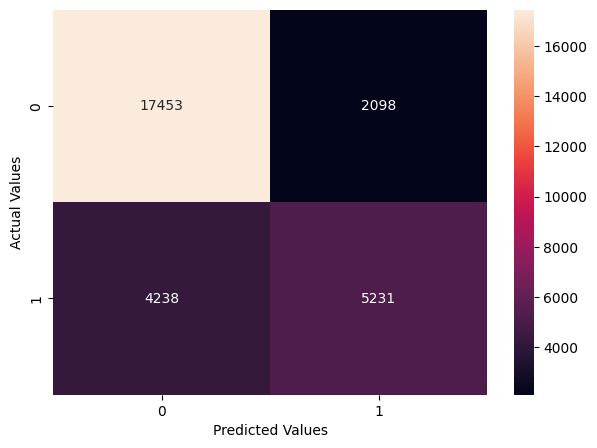

In [175]:
cm = confusion_matrix(y_train, pred_train4)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [176]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))


Accuracy on training set :  0.7816678152997932


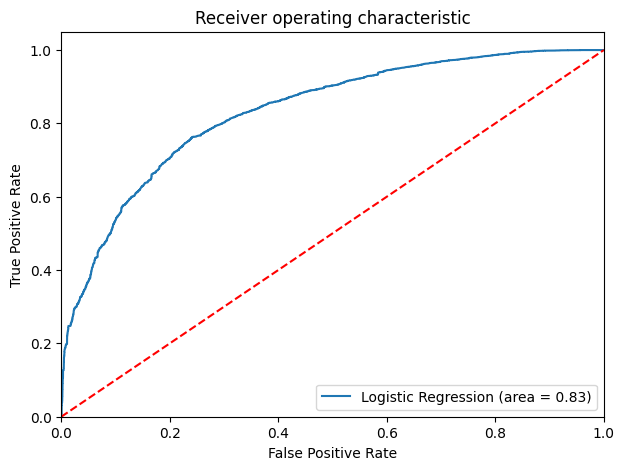

In [177]:
logit_roc_auc_train = roc_auc_score(y_train, logit5.predict(x_train5))
fpr, tpr, thresholds = roc_curve(y_train, logit5.predict(x_train5))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [178]:
X_test1 = x_test.drop([ 'no_of_weekend_nights_log',
                         'no_of_week_nights',
                         'market_segment_type_Online',
                         'market_segment_type_Offline',
                         'market_segment_type_Corporate',
                        'market_segment_type_Complementary',
                       'room_type_reserved_Room_Type 3',
                       'room_type_reserved_Room_Type 4',
                       'no_of_previous_bookings_not_canceled_log',
                       'room_type_reserved_Room_Type 2'

                     ], axis=1)

In [179]:
pred_test = logit5.predict(X_test1) > 0.5
pred_test = np.round(pred_test)
print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))
print("Accuracy on test set : ", accuracy_score(y_test, pred_test))

Accuracy on training set :  0.7816678152997932
Accuracy on test set :  0.7789110957960027


## Building a Decision Tree model

In [182]:
tree_data = dummy_data.astype(float)

In [186]:
tree_data = tree_data.drop(['arrival_date','arrival_year','no_of_week_nights',
'no_of_weekend_nights_log'  ], axis=1)

In [187]:
x = tree_data.drop("booking_status" , axis=1)
y = tree_data.pop("booking_status")

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)



*  using a simolifed data set for the tree




In [189]:
# building a decision tree using the dtclassifier function
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

Decision tree classifier(random_state=1)

In [190]:
# scoring the accurancy on train & test data
print("Accuracy on training set : ", dTree.score(x_train, y_train))
print("Accuracy on test set : ", dTree.score(x_test, y_test))

Accuracy on training set :  0.9924385633270322
Accuracy on test set :  0.8585867867315997


In [191]:
# checking the positive outcomes
y.sum(axis = 0)

11885.0


**Observations**

*   11885 predictions of cancellation and actual of 11989 isn't a good model.
*   The tree scores very well at accuracy, it captures most of the data.






In [192]:
# function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1,0]):
    y_predict =  model.predict(x_test)
    cm =metrics.confusion_matrix(y_actual, y_predict, labels=[0,1])
    df_cm = pd.DataFrame(cm, index = [i for i in["Actucal - No" , "Actual - Yes"]],
                  columns = [i for i in ["Predicted - No" , "Predicted - Yes"]])
    group_counts=["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
                zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('predicated label')

In [193]:
## function to calculate recall score
def get_recall_score(model):
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    print("Recall on training set : ",metrics. recall_score(y_train, pred_train))
    print("Recall on test set : ",metrics. recall_score(y_test, pred_test))

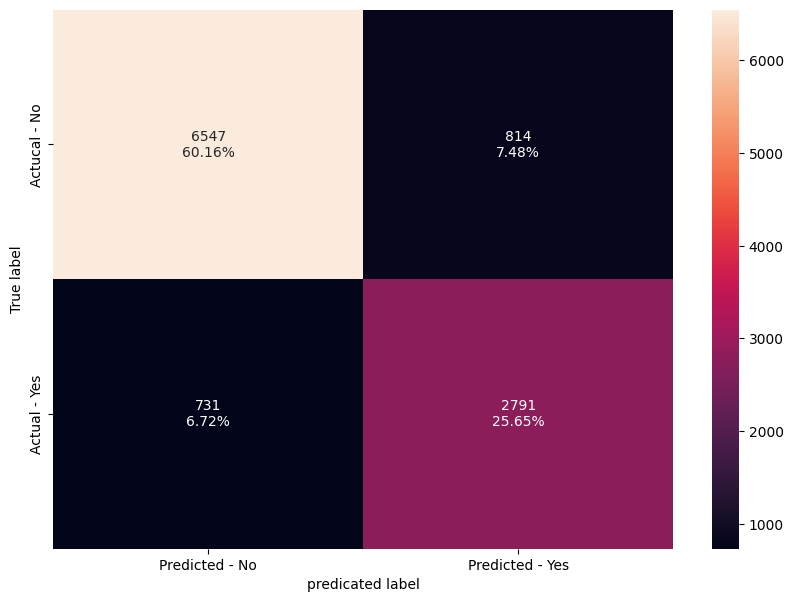

In [194]:
# another confusion matrix
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
make_confusion_matrix(dtree,y_test)

In [195]:
# check the recall on the train to test
get_recall_score(dtree)

Recall on training set :  0.9817051297381323
Recall on test set :  0.7924474730266894


In [196]:
the_features = list(x.columns)
print(the_features)

['no_of_adults', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'avg_price_per_room', 'length_stay', 'no_of_children_log', 'no_of_previous_cancellations_log', 'no_of_previous_bookings_not_canceled_log', 'no_of_special_requests_log', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


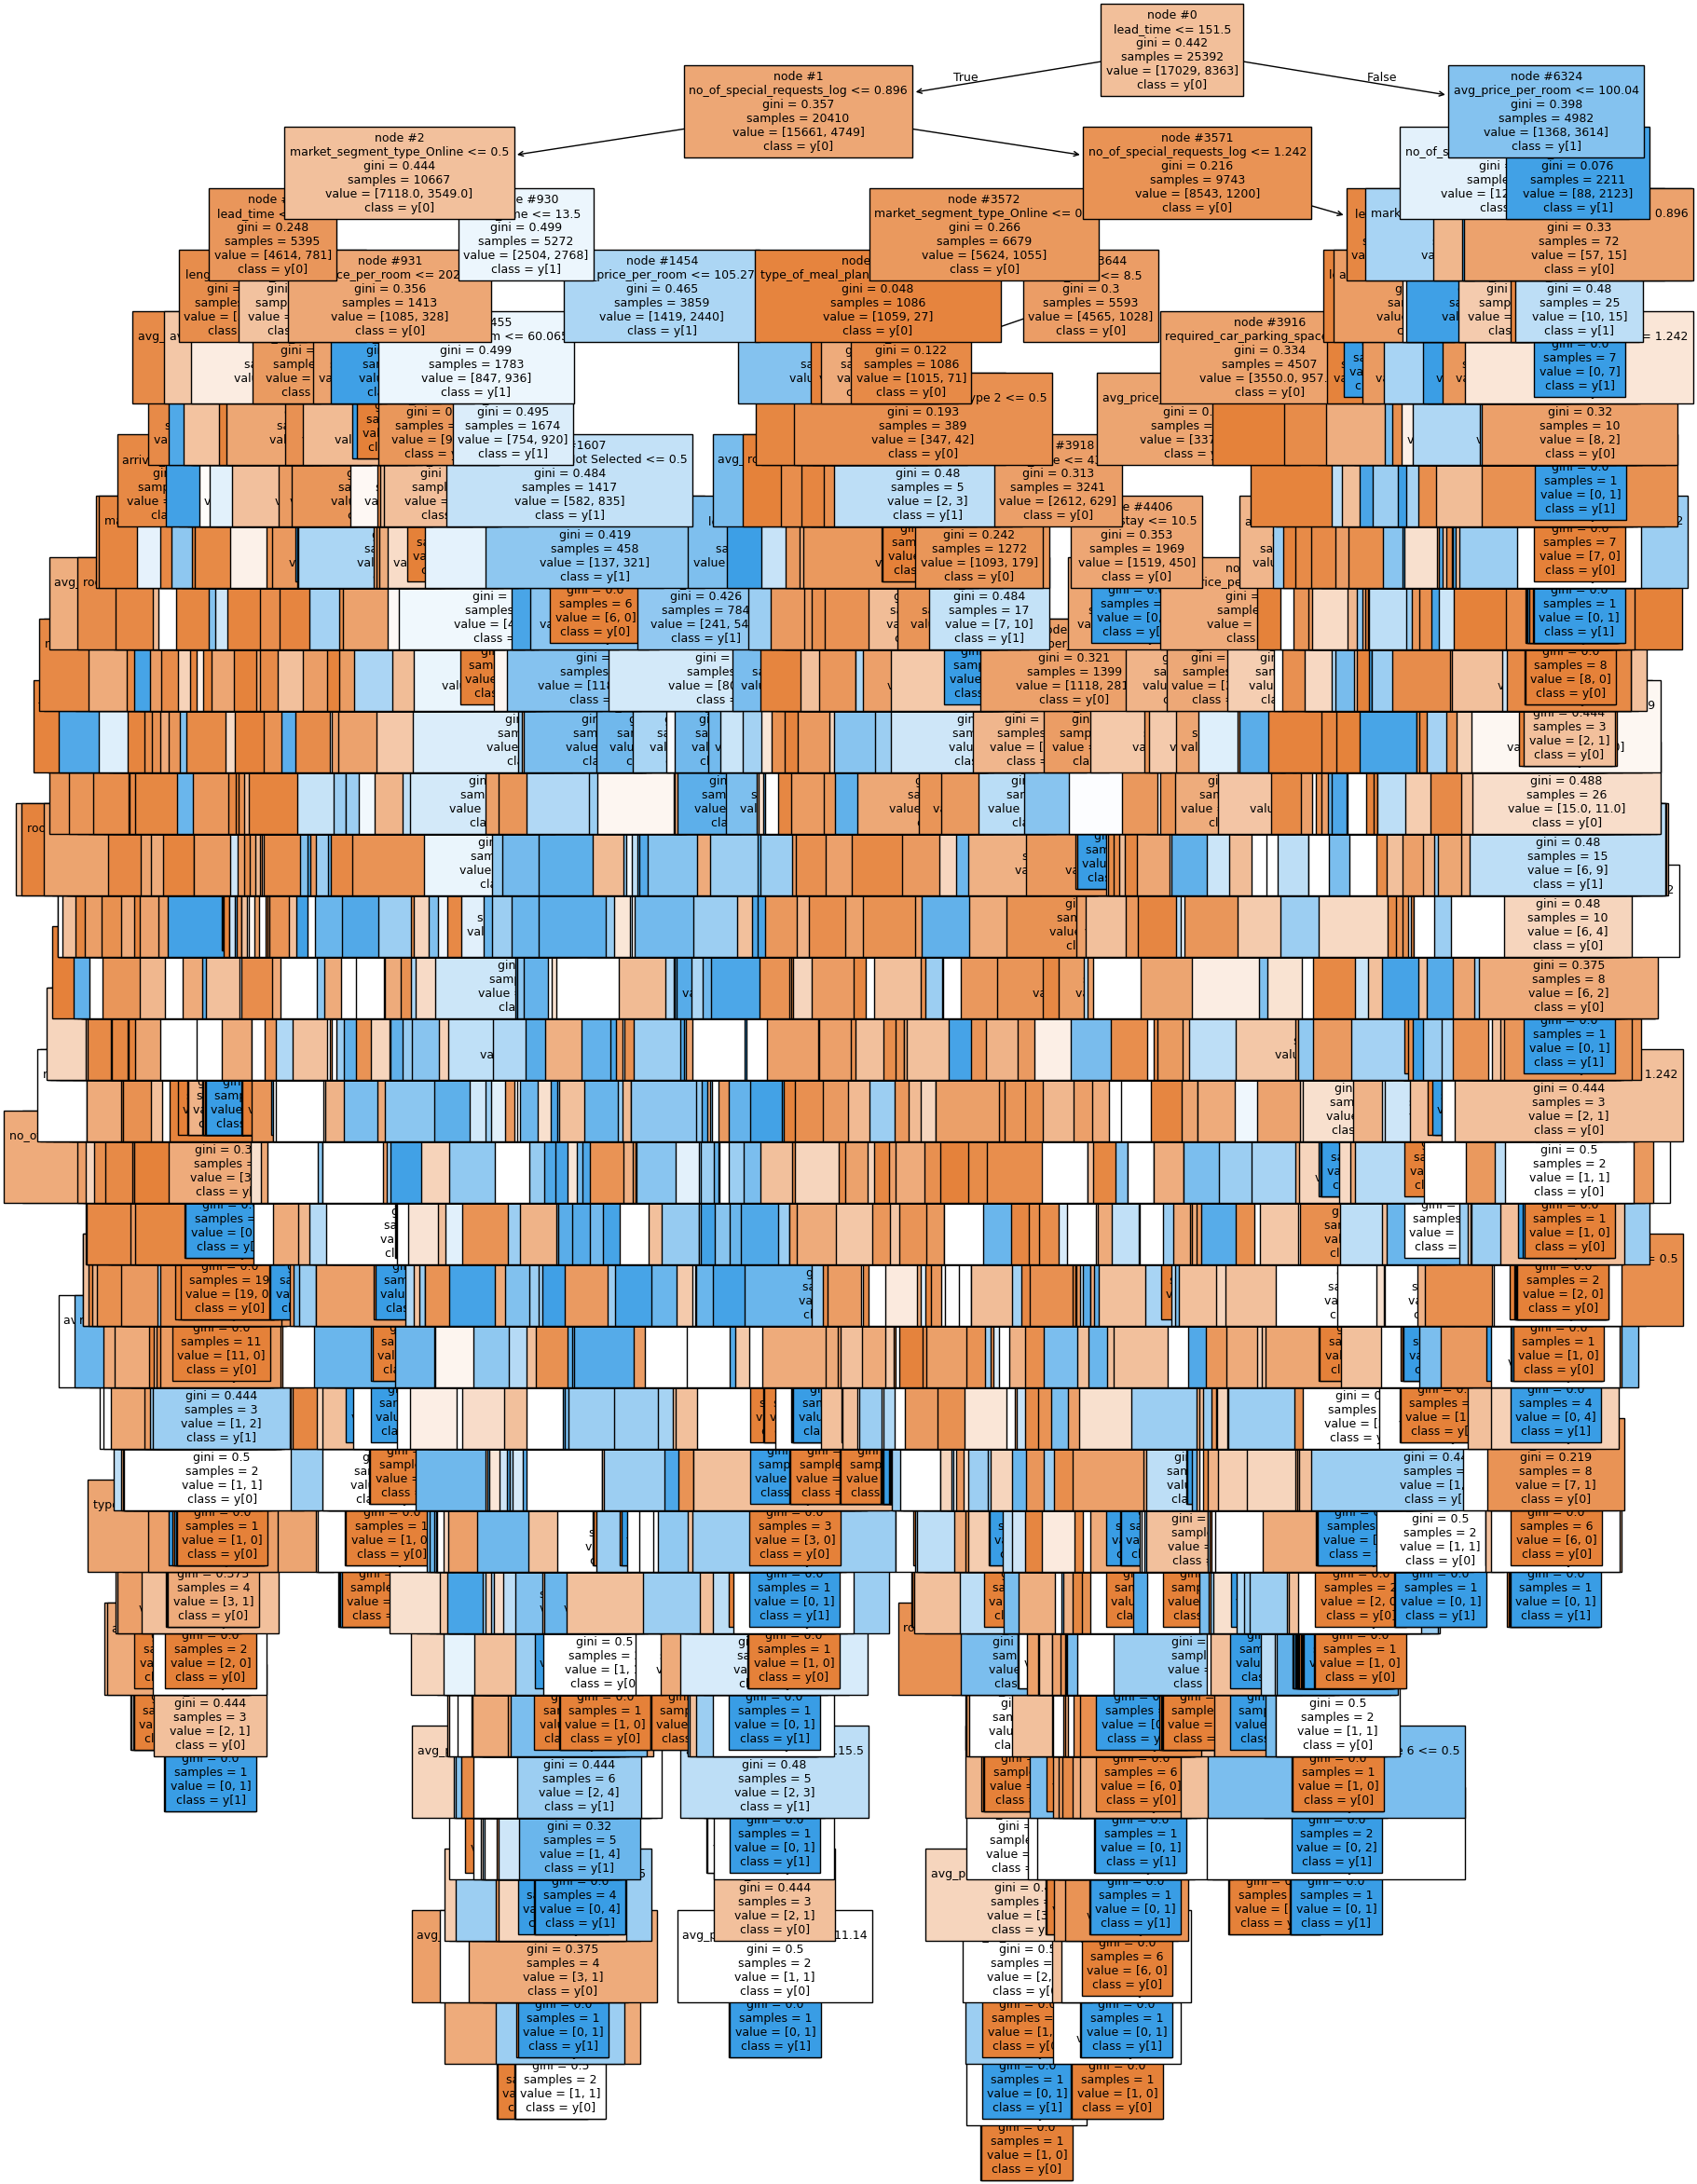

In [197]:
plt.figure(figsize=(20,30))
tree.plot_tree(dtree,feature_names=the_features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [198]:
print(tree.export_text(dtree,feature_names=the_features,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests_log <= 0.90
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- length_stay <= 5.50
|   |   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |   |--- lead_time <= 74.50
|   |   |   |   |   |   |   |--- arrival_month <= 5.50
|   |   |   |   |   |   |   |   |--- lead_time <= 1.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 62.00
|   |   |   |   |   |   |   |   |   |   |--- length_stay <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [15.00, 0.00] class: 0.0
|   |   |   |   |   |   |   |   |   |   |--- length_stay >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  62.00
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 151.59
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |  

In [199]:
# checking out what variable are being prioritized by the model.
print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                               Imp
lead_time                                 0.399009
avg_price_per_room                        0.204342
market_segment_type_Online                0.092752
arrival_month                             0.083932
length_stay                               0.074351
no_of_special_requests_log                0.068483
no_of_adults                              0.030179
type_of_meal_plan_Not Selected            0.010868
required_car_parking_space                0.007417
room_type_reserved_Room_Type 4            0.007339
no_of_children_log                        0.006595
type_of_meal_plan_Meal Plan 2             0.004375
market_segment_type_Offline               0.003333
room_type_reserved_Room_Type 2            0.002304
room_type_reserved_Room_Type 5            0.001582
market_segment_type_Corporate             0.001144
room_type_reserved_Room_Type 6            0.000674
repeated_guest                            0.000464
room_type_reserved_Room_Type 7 

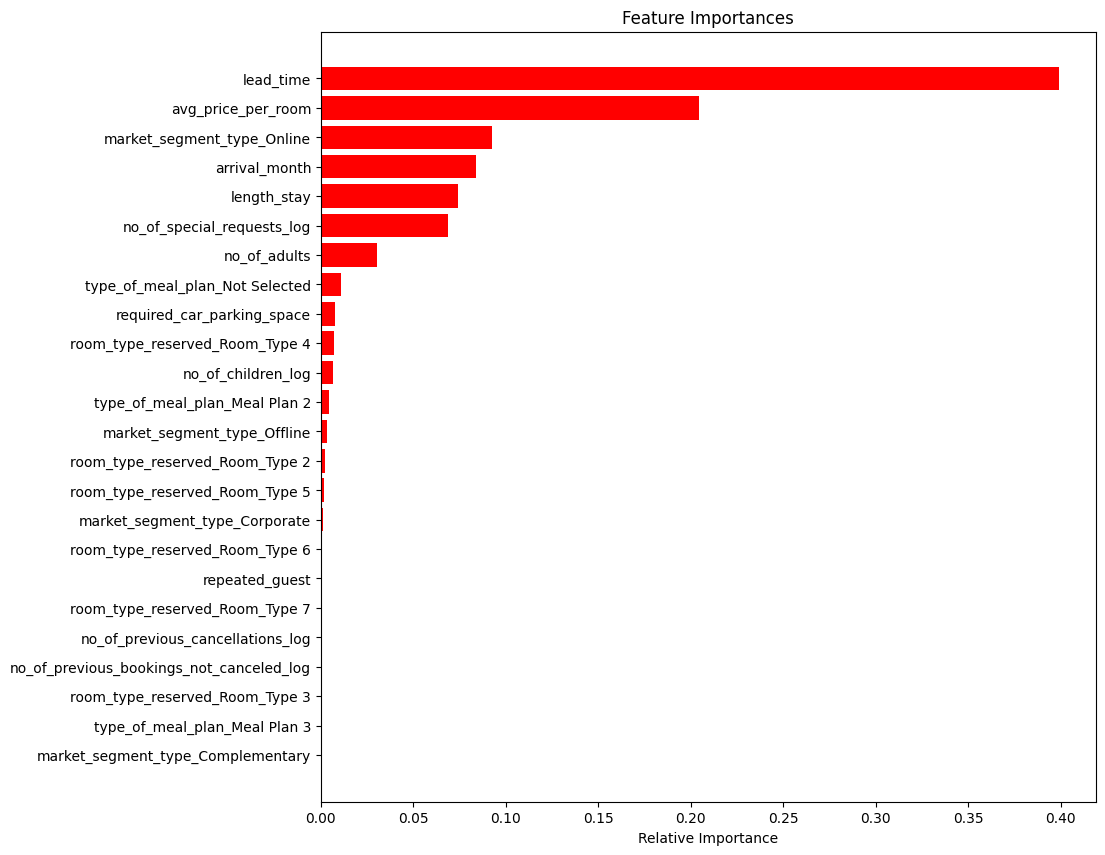

In [200]:
importances = dtree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)),[the_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Do we need to prune the tree?

Yes, we need to do prune the tree

In [201]:
## pre prune  the model with max depth hyperparamater
dTree1 = DecisionTreeClassifier(criterion = 'gini', max_depth=3,random_state=1)
dTree1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

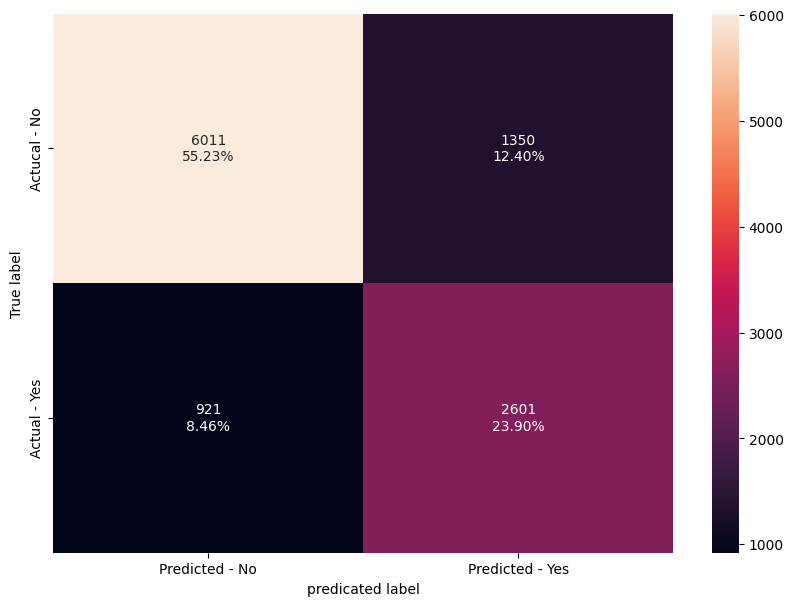

In [202]:
# another confusion matrix
make_confusion_matrix(dTree1,y_test)

In [203]:
# the accuracy  on the pre pruned tree
print("Accuracy on training set : ", dTree1.score(x_train, y_train))
print("Accuracy on test set : ", dTree1.score(x_test, y_test))
# checking the recall with the get_recall_score userdefined function
get_recall_score(dTree1)

Accuracy on training set :  0.7844202898550725
Accuracy on test set :  0.7913259211614444
Recall on training set :  0.7315556618438359
Recall on test set :  0.7385008517887564




*   with improved closeness in the training and testing we have successfully eliminated most of the noise from the first model(dTree)

*   Having th accurancy up to 78/79% is also improvement.

* Also very close to the recall metric, making this a much better than the first model





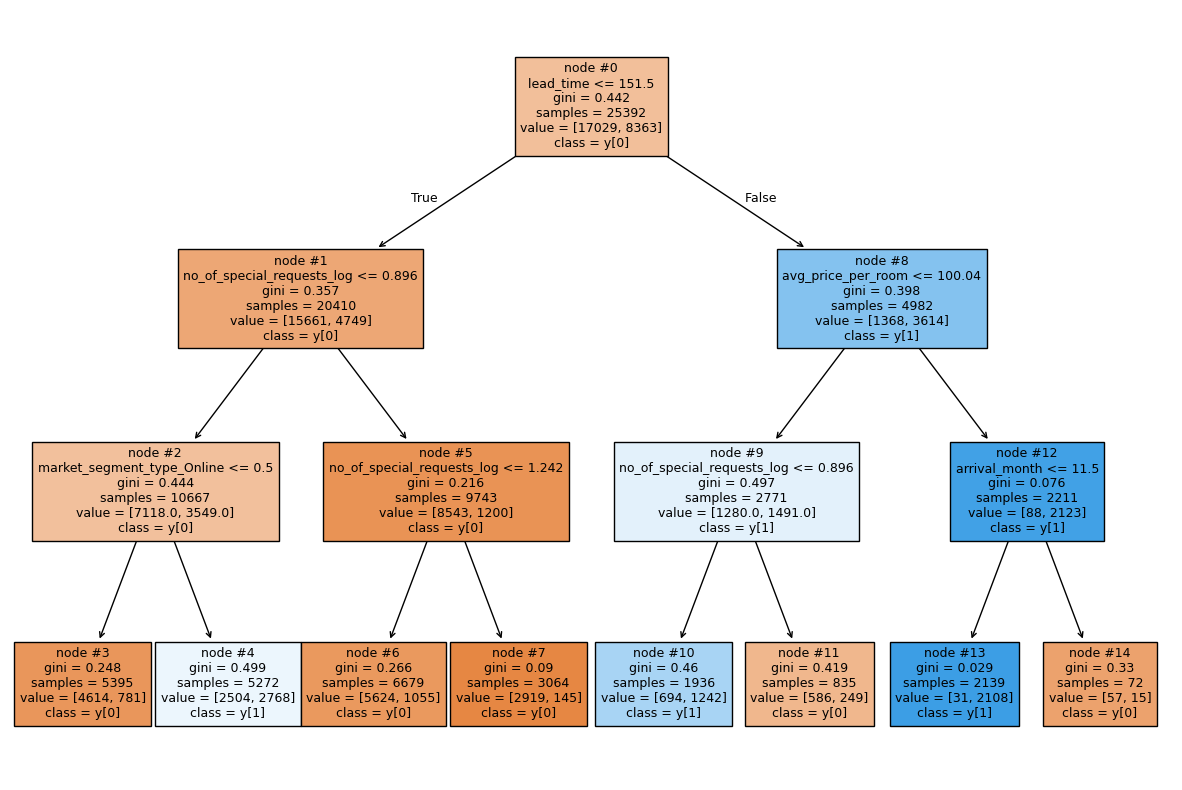

In [204]:
# Let's see the pree pruned tree
plt.figure(figsize=(15,10))
tree.plot_tree(dTree1,feature_names=the_features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [205]:
print(tree.export_text(dTree1,feature_names=the_features,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests_log <= 0.90
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [4614.00, 781.00] class: 0.0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2504.00, 2768.00] class: 1.0
|   |--- no_of_special_requests_log >  0.90
|   |   |--- no_of_special_requests_log <= 1.24
|   |   |   |--- weights: [5624.00, 1055.00] class: 0.0
|   |   |--- no_of_special_requests_log >  1.24
|   |   |   |--- weights: [2919.00, 145.00] class: 0.0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests_log <= 0.90
|   |   |   |--- weights: [694.00, 1242.00] class: 1.0
|   |   |--- no_of_special_requests_log >  0.90
|   |   |   |--- weights: [586.00, 249.00] class: 0.0
|   |--- avg_price_per_room >  100.04
|   |   |--- arrival_month <= 11.50
|   |   |   |--- weights: [31.00, 2108.00] class: 1.0
|   |   |--- arrival_month >  11.50
|   |   |   |--- weights: [57.00, 15.00] 

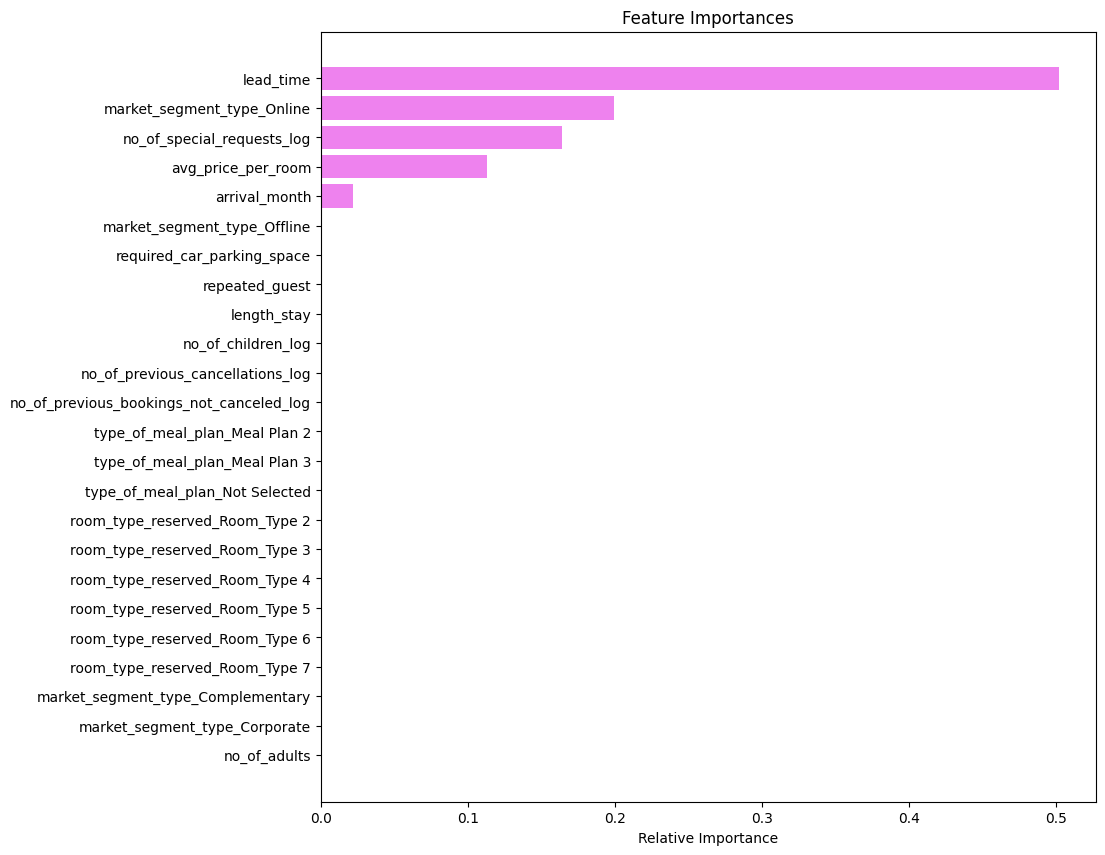

In [217]:
# Looking at the feature importances of this model
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [the_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Let's use GridSearch to hyperparameter tune the model**


In [219]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# scoring function used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

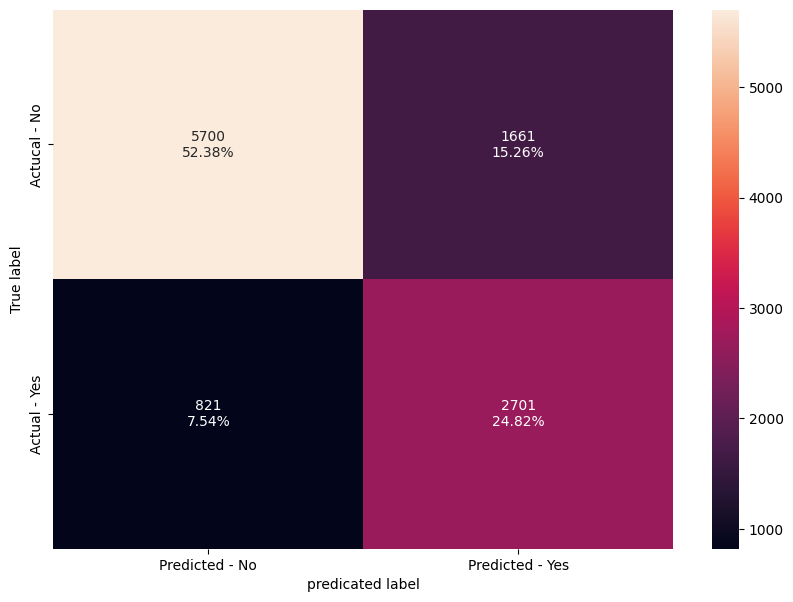

In [220]:
# run the estimator in a confusion matrix
make_confusion_matrix(estimator,y_test)

In [223]:
# The accuracy on the estimator tree.
print("Accuracy on training set : ",estimator.score(x_train, y_train))
print("Accuracy on test set : ",estimator.score(x_test, y_test))
# Check the recall with the get_recall_score user defined function
get_recall_score(dTree1)

Accuracy on training set :  0.7694943289224953
Accuracy on test set :  0.7719378847744188
Recall on training set :  0.7315556618438359
Recall on test set :  0.7385008517887564


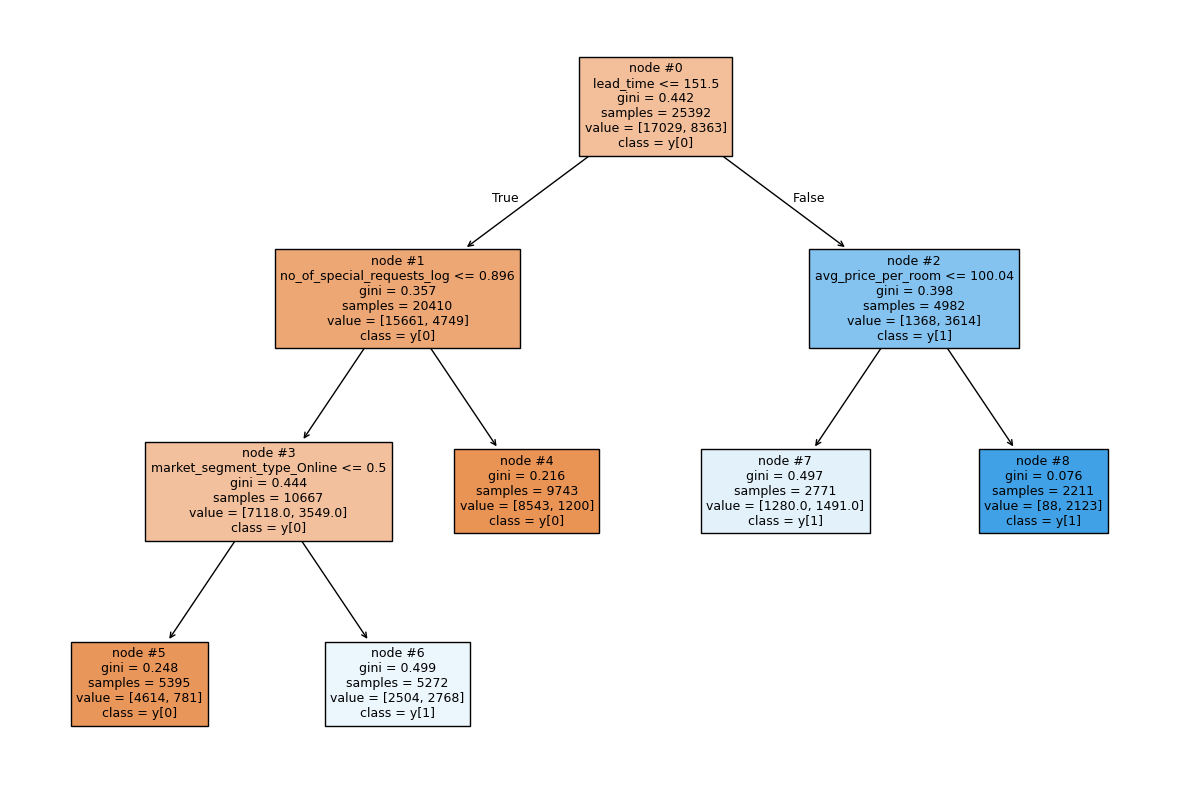

In [224]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=the_features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

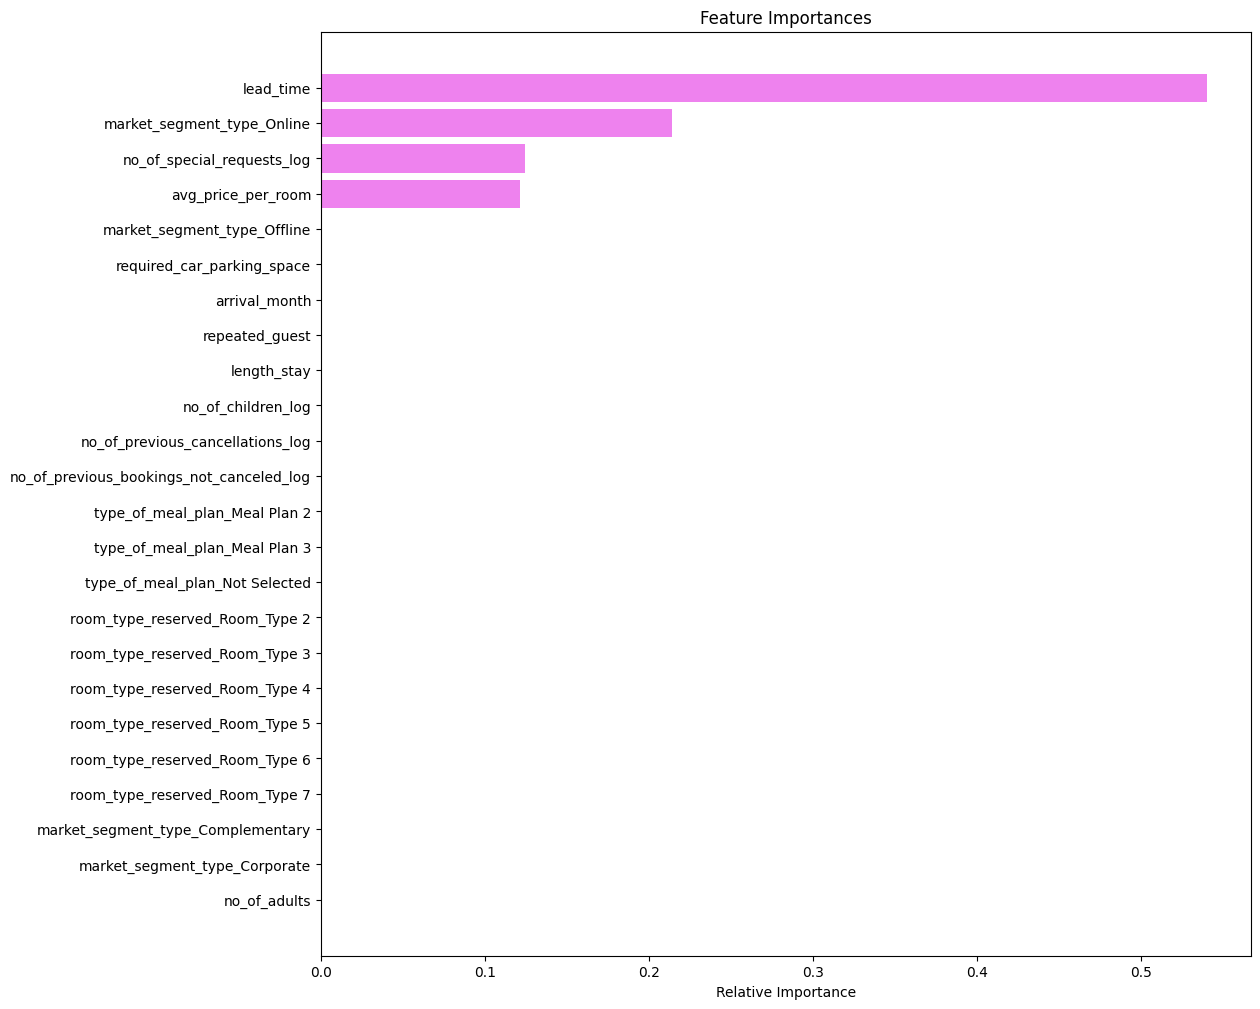

In [225]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [the_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Cost Complexity Pruning**


In [227]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [133]:
pd.DataFrame(path)

ccp_alphas  impurities
0       0.000000    0.013864
1       0.000000    0.013864
2       0.000000    0.013864
3       0.000000    0.013864
4       0.000000    0.013864
...          ...         ...
1580    0.006666    0.286897
1581    0.013045    0.299942
1582    0.017260    0.317202
1583    0.023990    0.365183
1584    0.076578    0.441761

[1585 rows x 2 columns]

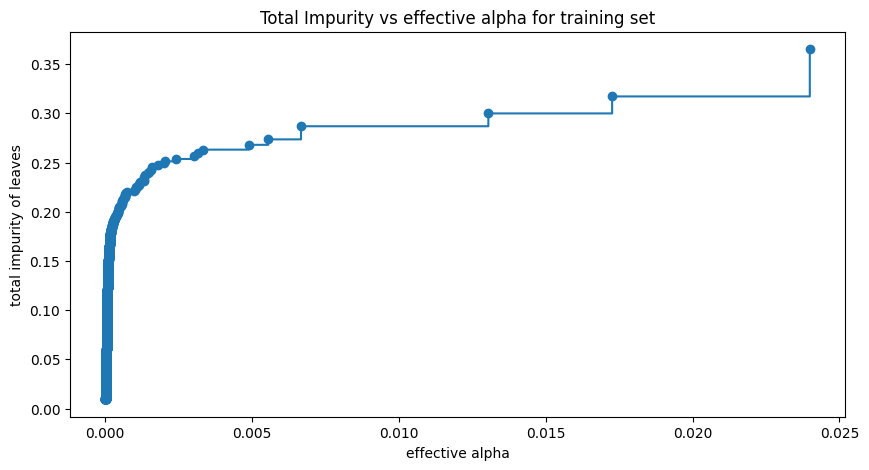

In [228]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [229]:
#Decisiion Tree calssifier for every alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0765778947737134


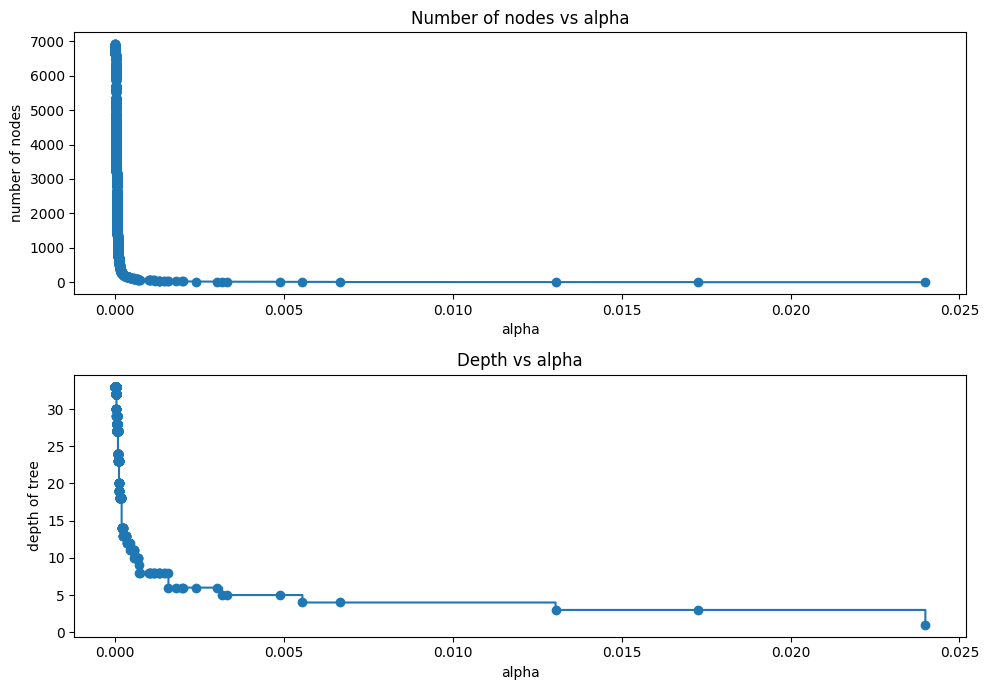

In [230]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [231]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

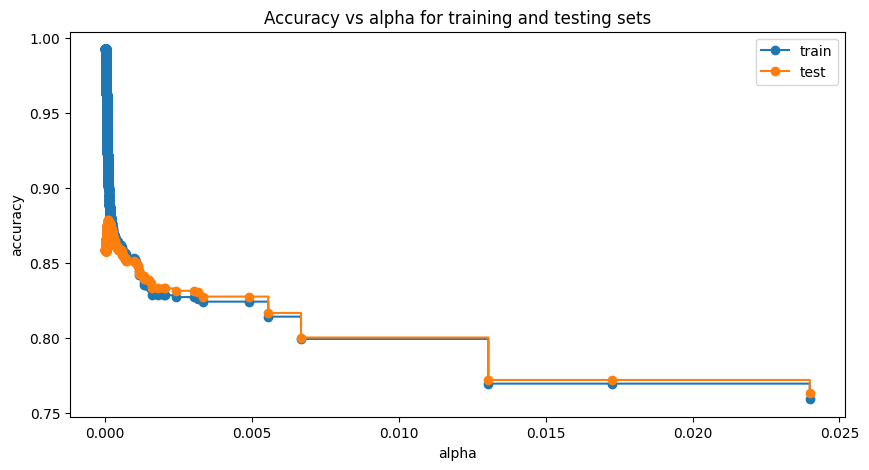

In [232]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [234]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(x_train, y_train))
print('Test accuracy of best model: ',best_model.score(x_test, y_test))

DecisionTreeClassifier(ccp_alpha=9.904212140385933e-05, random_state=1)
Training accuracy of best model:  0.90544265910523
Test accuracy of best model:  0.8783423688321235


In [236]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(x_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [238]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(x_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

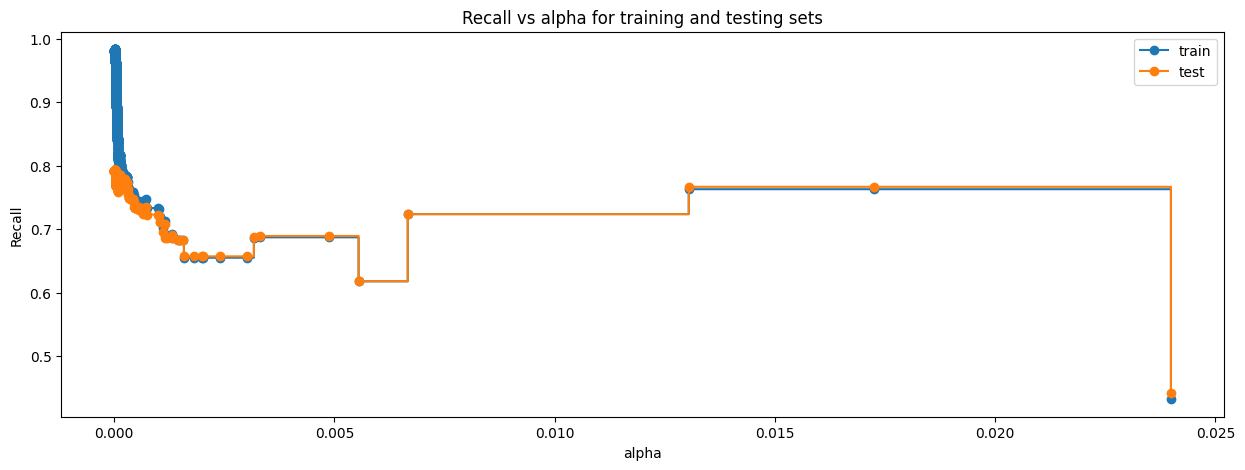

In [239]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

## Model Performance Comparison and Conclusions


In [240]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=2.450465588461807e-05, random_state=1)


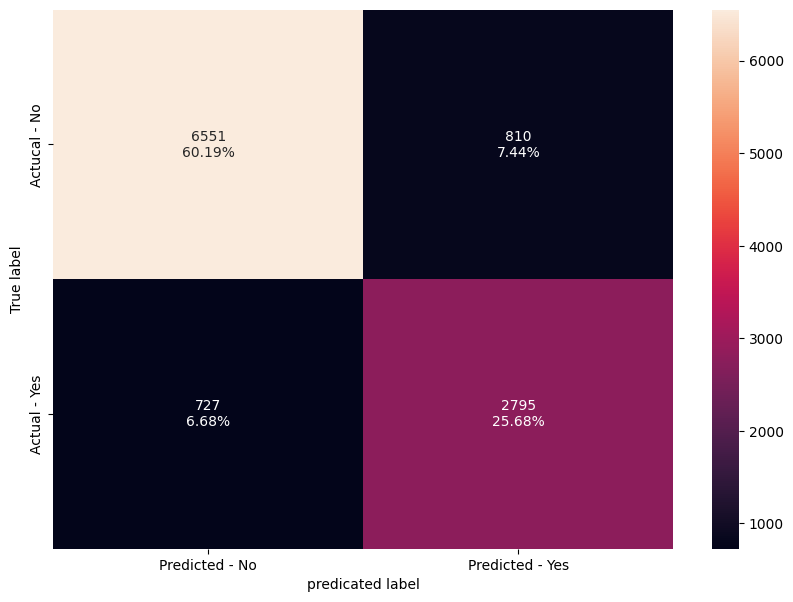

In [241]:
#another confusion matrix
make_confusion_matrix(best_model,y_test)

In [242]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9790744947985173
Recall on test set :  0.7935831913685406


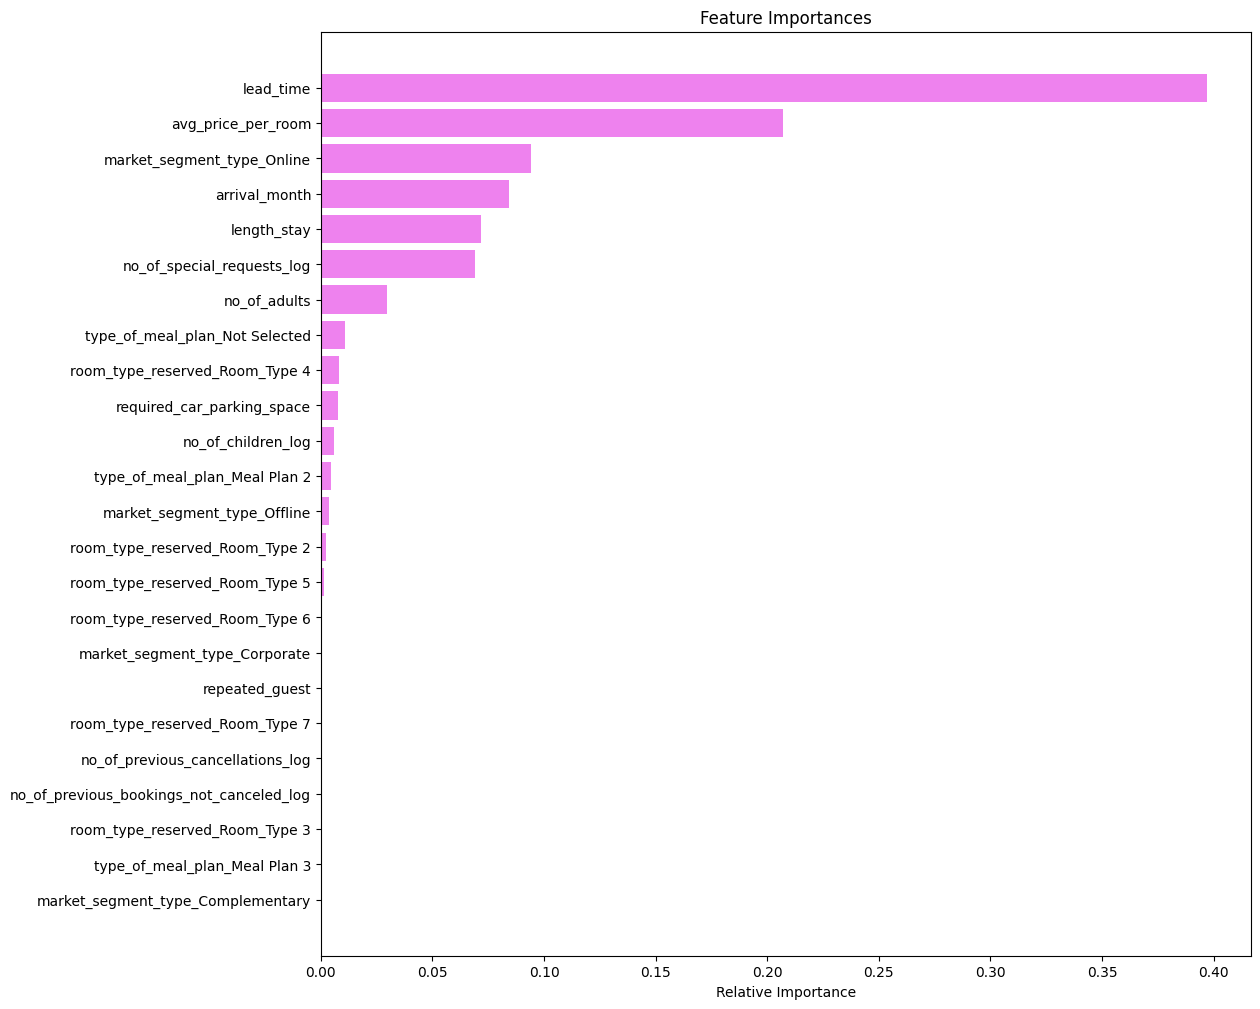

In [243]:
# showing what metrics this model used
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [the_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [244]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[.981,.732,.732,.979], 'Test_Recall':[.792,.739,.739,.794]})
comparison_frame

Model  Train_Recall  Test_Recall
0                  Initial decision tree model         0.981        0.792
1  Decision tree with restricted maximum depth         0.732        0.739
2    Decision treee with hyperparameter tuning         0.732        0.739
3              Decision tree with post-pruning         0.979        0.794

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

 **Insights**

 * Rooms booked in advance of 151 days (5 months) or less were much less likely to cancel the reservation.
 * Rooms booked over 151 days were more likely to cancel.
 * Price was the determining factor for the cancellations.
 * Cancelation was increased if the room was priced over 100.04 Euros.
 * Found better deals if the hotels bookeds early.

**My Recommendations**


1. Require a nonrefundable deposit on all rooms in advance of over 5 months.

2. Offer your best room rates before 5 months ahead. After that you may  increase your prices slightly to increase your profit.

3. On your booking with a menu of special requests available.
     * VIP
     * Room upgrades
     * Earning points
